In [2]:
# Importer des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc

In [3]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
# Setting pandas display options
pd.set_option("display.max_columns", 5000)
pd.set_option("display.max_rows", 5000)

In [6]:
# Importation de jeu de données
data = pd.read_csv("C:/Users/majd_/P6 Majd EL KHATIB/Flipkart/flipkart_com-ecommerce_sample_1050.csv", 
                   sep=',', encoding ='utf-8')

In [7]:
# I-Analyserer le jeu de données

In [8]:
# 1-Prétraitement :

In [9]:
data.shape

(1050, 15)

In [10]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [11]:
data.iloc[0:5]

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [13]:
# supprimer les variables non pertinentes 
data = data.drop(columns=['crawl_timestamp', 'product_url', 'pid', 
                          'retail_price', 'discounted_price', 'is_FK_Advantage_product',
                          'product_rating', 'overall_rating', 'product_specifications',])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   uniq_id                1050 non-null   object
 1   product_name           1050 non-null   object
 2   product_category_tree  1050 non-null   object
 3   image                  1050 non-null   object
 4   description            1050 non-null   object
 5   brand                  712 non-null    object
dtypes: object(6)
memory usage: 49.3+ KB


In [15]:
data.iloc[0:20]

uniq_id  \
0   55b85ea15a1536d46b7190ad6fff8ce7   
1   7b72c92c2f6c40268628ec5f14c6d590   
2   64d5d4a258243731dc7bbb1eef49ad74   
3   d4684dcdc759dd9cdf41504698d737d8   
4   6325b6870c54cd47be6ebfbffa620ec7   
5   893aa5ed55f7cff2eccea7758d7a86bd   
6   f355cc1ccb08bd0d283ed979b7ee7515   
7   dd0e3470a7e6ed76fd69c2da27721041   
8   41384da51732c0b4df3de8f395714fbb   
9   710ed5f2393a4b9e8823aa0029f71f93   
10  920154acbe49d3202ed7d2ed2df1ea13   
11  08452abdadb3db1e686b94a9c52fc7b6   
12  1e8741b5ae27a513546c94b3f3312aee   
13  189fa66a5fa6f08d2802a62ecf0be298   
14  bbb8cdc5406ff60ff06ff64630f2ca47   
15  1120bc768623572513df956172ffefeb   
16  5479bb7028827d60000720a2c135976a   
17  733aa1e801a139fa8dc7be9f0eff5ee0   
18  62c35de4df27437d3597963fac55a8b6   
19  33d97d63c037078cd3f08033966d6a88   

                                         product_name  \
0   Elegance Polyester Multicolor Abstract Eyelet ...   
1                          Sathiyas Cotton Bath Towel   
2                 Eurospa Cotton Terry Face Towel Set   
3   SANTOSH ROYAL FASHION Cotton Printed King size...   
4   Jaipur Print Cotton Floral King sized Double B...   
5   Maserati Time R8851116001 Analog Watch  - For ...   
6   Camerii WM64 Elegance Analog Watch  - For Men,...   
7   T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys   
8   Alfajr WY16B Youth Digital Watch  - For Men, Boys   
9   TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   
10  Calibro SW-125 Analog-Digital Watch  - For Men...   
11     Cartier W6701005 Analog Watch  - For Boys, Men   
12  Lois Caron LCS-4032 Analog Watch  - For Boys, Men   
13       Titan 1639SL03 Analog Watch  - For Boys, Men   
14  Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...   
15  Escort E-1700-906_Blk Analog Watch  - For Men,...   
16      Jack klein BlackLed Digital Watch  - For Boys   
17  North Moon IW-005-FK Silicone Ion Digital Watc...   
18   Franck Bella FB74C Analog Watch  - For Boys, Men   
19  Ridas Apl_led_black Apple Shape Digital Watch ...   

                                product_category_tree  \
0   ["Home Furnishing >> Curtains & Accessories >>...   
1   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3   ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4   ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
5   ["Watches >> Wrist Watches >> Maserati Time Wr...   
6   ["Watches >> Wrist Watches >> Camerii Wrist Wa...   
7   ["Watches >> Wrist Watches >> T STAR Wrist Wat...   
8   ["Watches >> Wrist Watches >> Alfajr Wrist Wat...   
9   ["Watches >> Wrist Watches >> TAG Heuer Wrist ...   
10  ["Watches >> Wrist Watches >> Calibro Wrist Wa...   
11  ["Watches >> Wrist Watches >> Cartier Wrist Wa...   
12  ["Watches >> Wrist Watches >> Lois Caron Wrist...   
13  ["Watches >> Wrist Watches >> Titan Wrist Watc...   
14  ["Watches >> Wrist Watches >> Srushti Art Jewe...   
15  ["Watches >> Wrist Watches >> Escort Wrist Wat...   
16  ["Watches >> Wrist Watches >> Jack klein Wrist...   
17  ["Watches >> Wrist Watches >> North Moon Wrist...   
18  ["Watches >> Wrist Watches >> Franck Bella Wri...   
19  ["Watches >> Wrist Watches >> Ridas Wrist Watc...   

                                   image  \
0   55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1   7b72c92c2f6c40268628ec5f14c6d590.jpg   
2   64d5d4a258243731dc7bbb1eef49ad74.jpg   
3   d4684dcdc759dd9cdf41504698d737d8.jpg   
4   6325b6870c54cd47be6ebfbffa620ec7.jpg   
5   893aa5ed55f7cff2eccea7758d7a86bd.jpg   
6   f355cc1ccb08bd0d283ed979b7ee7515.jpg   
7   dd0e3470a7e6ed76fd69c2da27721041.jpg   
8   41384da51732c0b4df3de8f395714fbb.jpg   
9   710ed5f2393a4b9e8823aa0029f71f93.jpg   
10  920154acbe49d3202ed7d2ed2df1ea13.jpg   
11  08452abdadb3db1e686b94a9c52fc7b6.jpg   
12  1e8741b5ae27a513546c94b3f3312aee.jpg   
13  189fa66a5fa6f08d2802a62ecf0be298.jpg   
14  bbb8cdc5406ff60ff06ff64630f2ca47.jpg   
15  1120bc768623572513df956172ffefeb.jpg   
16  5479bb7028827d60000720a2c135976a.jpg   


In [16]:
#supprimer les doublons
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(1050, 6)

In [18]:
# Vérification s'il y a des doublons dans uniq_id
data.duplicated(subset=['uniq_id']).any()

False

In [19]:
# Traitement de données manquantes :

In [20]:
data.isnull().sum()

uniq_id                    0
product_name               0
product_category_tree      0
image                      0
description                0
brand                    338
dtype: int64

In [21]:
# Remplacer chaque valeur manquante de brand
# par le premier mot de valeur correspondante de product_name 
for index in range(len(data)):
    if pd.isna(data.iloc[index]['brand']):
        data['brand'].iloc[index] = data['product_name'].iloc[index].split(" ")[0]

In [22]:
data.isnull().sum()

uniq_id                  0
product_name             0
product_category_tree    0
image                    0
description              0
brand                    0
dtype: int64

In [23]:
data.iloc[0:20]

uniq_id  \
0   55b85ea15a1536d46b7190ad6fff8ce7   
1   7b72c92c2f6c40268628ec5f14c6d590   
2   64d5d4a258243731dc7bbb1eef49ad74   
3   d4684dcdc759dd9cdf41504698d737d8   
4   6325b6870c54cd47be6ebfbffa620ec7   
5   893aa5ed55f7cff2eccea7758d7a86bd   
6   f355cc1ccb08bd0d283ed979b7ee7515   
7   dd0e3470a7e6ed76fd69c2da27721041   
8   41384da51732c0b4df3de8f395714fbb   
9   710ed5f2393a4b9e8823aa0029f71f93   
10  920154acbe49d3202ed7d2ed2df1ea13   
11  08452abdadb3db1e686b94a9c52fc7b6   
12  1e8741b5ae27a513546c94b3f3312aee   
13  189fa66a5fa6f08d2802a62ecf0be298   
14  bbb8cdc5406ff60ff06ff64630f2ca47   
15  1120bc768623572513df956172ffefeb   
16  5479bb7028827d60000720a2c135976a   
17  733aa1e801a139fa8dc7be9f0eff5ee0   
18  62c35de4df27437d3597963fac55a8b6   
19  33d97d63c037078cd3f08033966d6a88   

                                         product_name  \
0   Elegance Polyester Multicolor Abstract Eyelet ...   
1                          Sathiyas Cotton Bath Towel   
2                 Eurospa Cotton Terry Face Towel Set   
3   SANTOSH ROYAL FASHION Cotton Printed King size...   
4   Jaipur Print Cotton Floral King sized Double B...   
5   Maserati Time R8851116001 Analog Watch  - For ...   
6   Camerii WM64 Elegance Analog Watch  - For Men,...   
7   T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys   
8   Alfajr WY16B Youth Digital Watch  - For Men, Boys   
9   TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   
10  Calibro SW-125 Analog-Digital Watch  - For Men...   
11     Cartier W6701005 Analog Watch  - For Boys, Men   
12  Lois Caron LCS-4032 Analog Watch  - For Boys, Men   
13       Titan 1639SL03 Analog Watch  - For Boys, Men   
14  Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...   
15  Escort E-1700-906_Blk Analog Watch  - For Men,...   
16      Jack klein BlackLed Digital Watch  - For Boys   
17  North Moon IW-005-FK Silicone Ion Digital Watc...   
18   Franck Bella FB74C Analog Watch  - For Boys, Men   
19  Ridas Apl_led_black Apple Shape Digital Watch ...   

                                product_category_tree  \
0   ["Home Furnishing >> Curtains & Accessories >>...   
1   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3   ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4   ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
5   ["Watches >> Wrist Watches >> Maserati Time Wr...   
6   ["Watches >> Wrist Watches >> Camerii Wrist Wa...   
7   ["Watches >> Wrist Watches >> T STAR Wrist Wat...   
8   ["Watches >> Wrist Watches >> Alfajr Wrist Wat...   
9   ["Watches >> Wrist Watches >> TAG Heuer Wrist ...   
10  ["Watches >> Wrist Watches >> Calibro Wrist Wa...   
11  ["Watches >> Wrist Watches >> Cartier Wrist Wa...   
12  ["Watches >> Wrist Watches >> Lois Caron Wrist...   
13  ["Watches >> Wrist Watches >> Titan Wrist Watc...   
14  ["Watches >> Wrist Watches >> Srushti Art Jewe...   
15  ["Watches >> Wrist Watches >> Escort Wrist Wat...   
16  ["Watches >> Wrist Watches >> Jack klein Wrist...   
17  ["Watches >> Wrist Watches >> North Moon Wrist...   
18  ["Watches >> Wrist Watches >> Franck Bella Wri...   
19  ["Watches >> Wrist Watches >> Ridas Wrist Watc...   

                                   image  \
0   55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1   7b72c92c2f6c40268628ec5f14c6d590.jpg   
2   64d5d4a258243731dc7bbb1eef49ad74.jpg   
3   d4684dcdc759dd9cdf41504698d737d8.jpg   
4   6325b6870c54cd47be6ebfbffa620ec7.jpg   
5   893aa5ed55f7cff2eccea7758d7a86bd.jpg   
6   f355cc1ccb08bd0d283ed979b7ee7515.jpg   
7   dd0e3470a7e6ed76fd69c2da27721041.jpg   
8   41384da51732c0b4df3de8f395714fbb.jpg   
9   710ed5f2393a4b9e8823aa0029f71f93.jpg   
10  920154acbe49d3202ed7d2ed2df1ea13.jpg   
11  08452abdadb3db1e686b94a9c52fc7b6.jpg   
12  1e8741b5ae27a513546c94b3f3312aee.jpg   
13  189fa66a5fa6f08d2802a62ecf0be298.jpg   
14  bbb8cdc5406ff60ff06ff64630f2ca47.jpg   
15  1120bc768623572513df956172ffefeb.jpg   
16  5479bb7028827d60000720a2c135976a.jpg   


In [24]:
# Décomposition de 'product_category_tree' en 3 catégories 

In [25]:
def get_categories_from_feature(feature):
    
    import re
    def get_categorie_from_list(list):
       # Supprimer des caractères indésirables de la chaîne
        list = list.strip('[]""')
        # prendre les 3 premières catégories
        categories_from_list = list.split(" >> ")
        categories = pd.Series()
        # Créer les 3 catégories 
        for i in range(min(3, len(categories_from_list))):
            categories["category_{}".format(i+1)] = categories_from_list[i]
        return categories
    # split
    data_categories = feature.apply(get_categorie_from_list).fillna("")

    return data_categories

In [26]:
# Créer un dataset avec les 3 variables catégories
data_categories = get_categories_from_feature(data['product_category_tree'])

In [27]:
data_categories.iloc[0:5]

category_1              category_2        category_3
0  Home Furnishing  Curtains & Accessories          Curtains
1        Baby Care        Baby Bath & Skin  Baby Bath Towels
2        Baby Care        Baby Bath & Skin  Baby Bath Towels
3  Home Furnishing               Bed Linen         Bedsheets
4  Home Furnishing               Bed Linen         Bedsheets

In [28]:
# Ajouter les 3 variables catégories à notre jeu de données
data = pd.concat([data, data_categories], sort=False, axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   uniq_id                1050 non-null   object
 1   product_name           1050 non-null   object
 2   product_category_tree  1050 non-null   object
 3   image                  1050 non-null   object
 4   description            1050 non-null   object
 5   brand                  1050 non-null   object
 6   category_1             1050 non-null   object
 7   category_2             1050 non-null   object
 8   category_3             1050 non-null   object
dtypes: object(9)
memory usage: 82.0+ KB


In [30]:
# II-Construction de corpus description des produits afin d'extraires des variables

In [31]:
# Ajouter les variables représentant une description des produits
# dans une même variable
data['descriptions'] = data['product_name'] + ' ' + data['description'] + ' ' + data['brand']

In [32]:
# Mettre les données textuelles dans un corpus
corpus = data['descriptions'].str.cat(sep=' ')

In [33]:
# Exploration du texte
list_of_words = corpus.split()

In [34]:
def table_results(list_of_words, champ1, champ2):
    x = len(list_of_words)
    y = len(set(list_of_words))
    dict_results = {" ":[champ1, champ2], "Nb":[x,y]}
    data_results = pd.DataFrame(dict_results)
    return data_results

In [35]:
table_results(list_of_words, "Words", "Unique Words")

Nb
0         Words  89006
1  Unique Words   9593

In [36]:
# 1-Représenter le corpus en tf-idf (term frequency-inverse document frequency) :

In [37]:
#import nltk
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNe
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.snowball import EnglishStemmer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words = 'english',
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1,1),
    # seuil fréquence 
    max_df=0.95, 
    min_df=3,
)

In [39]:
# pré-traitement des données.
# on utilise le lemmatiseur et le stemmer. 
# De plus, les mots vides ont été utilisés avec les mots d'une 
# longueur inférieure à 3 caractères pour réduire certains mots parasites.

In [43]:
# Stopwords and single letters
import string 
english_sw = nltk.corpus.stopwords.words('english')
single_let_sw = list(string.ascii_lowercase)
sw = list(set(english_sw + single_let_sw))

In [44]:
def tokenize_clean(document, stopwords=None, keep_tags=None, # ('NN' or 'JJ')
                   lemmatizer=None, stemmer=None):
    # 1 - tokenizing les mots dans chaque description
    tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
    li_words = tokenizer.tokenize(document)
    # 2 - lower case
    li_words = [s.lower() for s in li_words]
    # 3 - garder seulement certains tags
    if keep_tags is not None:
        li_words = [word for word,tag in nltk.pos_tag(li_words)\
            if tag in keep_tags]
    if stopwords is None: stopwords=[]
    # 4 - lemmatizing ou stemming
    if lemmatizer is not None:
        lem_doc = lemmatizer(' '.join(li_words))
        li_words = [token.lemma_ for token in lem_doc]
    elif stemmer is not None:
        li_words = [stemmer.stem(s) for s in li_words]
    # 5 - Supprimer stopwords
    li_words = [s for s in li_words if s not in stopwords]

    return li_words

In [59]:
from nltk.stem.snowball import EnglishStemmer
import spacy
import en_core_web_sm
import yaml
stemmer = EnglishStemmer()
lemmatizer = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [62]:
# Stemmer et lemmatizer
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
data['descriptions_cleaned'] = \
    data['descriptions'].apply(lambda x: \
                                     tokenize_clean(x,
                                                    stopwords=sw,
                                                    keep_tags=['NN','JJ'],
                                                    stemmer=None))\
                               .apply(lambda x: ' '.join(x))
stop_word=set(nltk.corpus.stopwords.words('english'))
def clean_text(corpus):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(corpus)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_word and len(w)>3]
    corpus_cleaned=" ".join(tokens)
    return corpus_cleaned

In [67]:
data['descriptions_cleaned2'] = data['descriptions_cleaned'].apply(clean_text)

In [68]:
corpus = data['descriptions_cleaned2']

In [69]:
data.iloc[0].descriptions

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

In [70]:
data.iloc[0].descriptions_cleaned2

'elegance polyester multicolor abstract eyelet door curtain elegance polyester multicolor abstract eyelet door floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain look curtain high quality polyester fabric eyelet style stitch metal room environment romantic curtain wrinkle anti shrinkage elegant apparance home bright modernistic appeal surreal attention sure contemporary eyelet valance first thing morning bright good morning whole world evening special joyous beauty soothing home elegant curtain light room right amount sunlight elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance door type eyelet model name abstract polyester door curtain model duster color multicolor number pack package body design material polyester elegance'

In [71]:
# Appliquer tf-idf sur notre corpus
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

In [72]:
def table_tfidf(corpus, champ1, champ2):
    X_tfidf = tfidf_vectorizer.fit_transform(corpus)
    x = len(list(tfidf_vectorizer.vocabulary_))
    y = len(tfidf_vectorizer.stop_words_)
    dict_results = {" ":[champ1, champ2], "Nb":[x,y]}
    data_results = pd.DataFrame(dict_results)
    return data_results

In [73]:
table_tfidf(corpus, "Vocabulary", "Stop Words")

Nb
0  Vocabulary   921
1  Stop Words  2143

In [74]:
# Maitenant création une DataFrame de tf-idf de vocabulaire
import operator
X_tfidf_dense  = X_tfidf.todense()
# sort par les indices
sorted_vocabulary = sorted(tfidf_vectorizer.vocabulary_.items(), key=operator.itemgetter(1))
sorted_vocabulary = [ word for (word, word_indice) in sorted_vocabulary ]

# pd.DataFrame avec les vocabulaires
vocabulary_TFIDF = pd.DataFrame(X_tfidf_dense , columns=sorted_vocabulary)
vocabulary_TFIDF.columns = [str(col) for col in vocabulary_TFIDF.columns]

In [75]:
vocabulary_TFIDF.iloc[0:5]

aapno  abkl  able  absorbent  abstract  actual  adapter  adaptor  addition  \
0    0.0   0.0   0.0        0.0  0.229451     0.0      0.0      0.0       0.0   
1    0.0   0.0   0.0        0.0  0.000000     0.0      0.0      0.0       0.0   
2    0.0   0.0   0.0        0.0  0.000000     0.0      0.0      0.0       0.0   
3    0.0   0.0   0.0        0.0  0.000000     0.0      0.0      0.0       0.0   
4    0.0   0.0   0.0        0.0  0.000000     0.0      0.0      0.0       0.0   

   additional  adhesive  adidas  adjustable  adorable  adsl  advice  aero  \
0         0.0       0.0     0.0         0.0       0.0   0.0     0.0   0.0   
1         0.0       0.0     0.0         0.0       0.0   0.0     0.0   0.0   
2         0.0       0.0     0.0         0.0       0.0   0.0     0.0   0.0   
3         0.0       0.0     0.0         0.0       0.0   0.0     0.0   0.0   
4         0.0       0.0     0.0         0.0       0.0   0.0     0.0   0.0   

   affordable  akup  alarm  almond  aloevera  aluminium  amazing  analog  \
0         0.0   0.0    0.0     0.0       0.0        0.0      0.0     0.0   
1         0.0   0.0    0.0     0.0       0.0        0.0      0.0     0.0   
2         0.0   0.0    0.0     0.0       0.0        0.0      0.0     0.0   
3         0.0   0.0    0.0     0.0       0.0        0.0      0.0     0.0   
4         0.0   0.0    0.0     0.0       0.0        0.0      0.0     0.0   

   andre  android  angel  animal  anna      anti  antique  antiqueshop  \
0    0.0      0.0    0.0     0.0   0.0  0.118658      0.0          0.0   
1    0.0      0.0    0.0     0.0   0.0  0.000000      0.0          0.0   
2    0.0      0.0    0.0     0.0   0.0  0.000000      0.0          0.0   
3    0.0      0.0    0.0     0.0   0.0  0.000000      0.0          0.0   
4    0.0      0.0    0.0     0.0   0.0  0.000000      0.0          0.0   

     appeal  appearance  apple  approx  arabian  area  aroma  artificial  \
0  0.123835         0.0    0.0     0.0      0.0   0.0    0.0         0.0   
1  0.000000         0.0    0.0     0.0      0.0   0.0    0.0         0.0   
2  0.000000         0.0    0.0     0.0      0.0   0.0    0.0         0.0   
3  0.000000         0.0    0.0     0.0      0.0   0.0    0.0         0.0   
4  0.000000         0.0    0.0     0.0      0.0   0.0    0.0         0.0   

   artist  artistic  assembly  assure  asus  attention  attitude  attivo  \
0     0.0       0.0       0.0     0.0   0.0   0.130766       0.0     0.0   
1     0.0       0.0       0.0     0.0   0.0   0.000000       0.0     0.0   
2     0.0       0.0       0.0     0.0   0.0   0.000000       0.0     0.0   
3     0.0       0.0       0.0     0.0   0.0   0.000000       0.0     0.0   
4     0.0       0.0       0.0     0.0   0.0   0.000000       0.0     0.0   

   attractive  audio  authentication  automatic  availability  available  \
0         0.0    0.0             0.0        0.0           0.0        0.0   
1         0.0    0.0             0.0        0.0           0.0        0.0   
2         0.0    0.0             0.0        0.0           0.0        0.0   
3         0.0    0.0             0.0        0.0           0.0        0.0   
4         0.0    0.0             0.0        0.0           0.0        0.0   

   awesome  baby  background  band  bank  base  basic      bath  battery  \
0      0.0   0.0         0.0   0.0   0.0   0.0    0.0  0.000000      0.0   
1      0.0   0.0         0.0   0.0   0.0   0.0    0.0  0.504584      0.0   
2      0.0   0.0         0.0   0.0   0.0   0.0    0.0  0.196662      0.0   
3      0.0   0.0         0.0   0.0   0.0   0.0    0.0  0.000000      0.0   
4      0.0   0.0         0.0   0.0   0.0   0.0    0.0  0.000000      0.0   

   bazaar  beach  beautiful  beautifull    beauty  bedroom  bedsheet  beige  \
0     0.0    0.0        0.0         0.0  0.114525      0.0  0.000000    0.0   
1     0.0    0.0        0.0         0.0  0.000000      0.0  0.000000    0.0   
2     0.0    0.0        0.0         0.0  0.000000      0.0  0.000000    0.0   
3     0

In [76]:
# Exportation
np.savetxt("vocabulary_TFIDF.csv", vocabulary_TFIDF)

In [77]:
# 2-Représenter le corpus avec Non-negative Matrix Factorization (NMF)

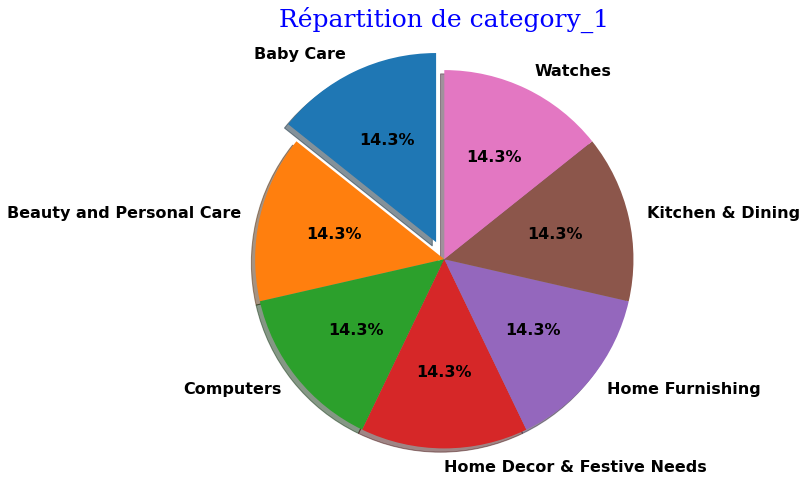

In [78]:
#La répartition de category_1 :

category_1 = data.groupby(by='category_1')['uniq_id'].nunique().sort_values(ascending=False)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes = np.zeros(7)
explodes[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(category_1, labels=category_1.index, explode=explodes, autopct='%1.1f%%',shadow=True, startangle=90,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition de category_1", fontdict=font)
plt.show()


In [79]:
# On trouve 7 catégories dans category_1
# il peut nous servir pour choisir le n_components dans NMF

In [80]:
from sklearn.decomposition import NMF
model_nmf = NMF(n_components=7, random_state=133, alpha=.1, l1_ratio=.5, init='nndsvd')
# Fit le modèle
model_nmf.fit(vocabulary_TFIDF)
vocabulary_NMF = model_nmf.transform(vocabulary_TFIDF)

In [81]:
# Déterminer le topic dominant pour chaque document

In [82]:
# column names
topicnames = ["topic" + str(i) for i in range(7)]

# index names
docnames = ["doc" + str(i) for i in range(len(data))]

# dataframe
data_document_topic = pd.DataFrame(np.round(vocabulary_NMF, 2), columns=topicnames, index=docnames)

# topic dominant pour chaque document
dominant_topic = np.argmax(data_document_topic.values, axis=1)
data_document_topic['dominant_topic_NMF'] = dominant_topic

In [83]:
data_document_topic

topic0  topic1  topic2  topic3  topic4  topic5  topic6  \
doc0       0.00    0.00    0.00    0.00    0.00    0.14    0.05   
doc1       0.00    0.00    0.05    0.00    0.00    0.13    0.00   
doc2       0.00    0.00    0.04    0.01    0.00    0.12    0.00   
doc3       0.00    0.00    0.01    0.00    0.00    0.13    0.03   
doc4       0.00    0.00    0.01    0.00    0.00    0.14    0.03   
doc5       0.18    0.01    0.00    0.00    0.00    0.00    0.00   
doc6       0.16    0.02    0.00    0.00    0.00    0.00    0.00   
doc7       0.06    0.00    0.01    0.00    0.00    0.00    0.00   
doc8       0.12    0.04    0.00    0.00    0.00    0.00    0.00   
doc9       0.16    0.01    0.00    0.00    0.00    0.01    0.00   
doc10      0.07    0.00    0.00    0.00    0.00    0.06    0.00   
doc11      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc12      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc13      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc14      0.12    0.03    0.00    0.01    0.00    0.00    0.00   
doc15      0.09    0.00    0.00    0.00    0.00    0.01    0.00   
doc16      0.13    0.03    0.00    0.00    0.00    0.00    0.00   
doc17      0.08    0.02    0.00    0.00    0.00    0.00    0.00   
doc18      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc19      0.09    0.03    0.00    0.00    0.00    0.01    0.00   
doc20      0.07    0.02    0.00    0.00    0.00    0.00    0.00   
doc21      0.15    0.01    0.00    0.00    0.00    0.00    0.00   
doc22      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc23      0.09    0.03    0.00    0.00    0.00    0.00    0.00   
doc24      0.12    0.01    0.00    0.00    0.00    0.00    0.00   
doc25      0.12    0.04    0.00    0.00    0.00    0.00    0.00   
doc26      0.20    0.01    0.00    0.00    0.00    0.00    0.00   
doc27      0.13    0.03    0.00    0.00    0.00    0.00    0.00   
doc28      0.04    0.00    0.00    0.00    0.00    0.06    0.00   
doc29      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc30      0.11    0.01    0.00    0.00    0.00    0.01    0.00   
doc31      0.21    0.01    0.00    0.01    0.00    0.00    0.00   
doc32      0.24    0.02    0.00    0.00    0.00    0.00    0.00   
doc33      0.00    0.00    0.04    0.00    0.00    0.15    0.00   
doc34      0.00    0.00    0.05    0.00    0.00    0.10    0.01   
doc35      0.00    0.05    0.00    0.00    0.00    0.00    0.01   
doc36      0.00    0.01    0.00    0.02    0.00    0.04    0.00   
doc37      0.01    0.00    0.00    0.00    0.00    0.09    0.00   
doc38      0.00    0.00    0.00    0.00    0.00    0.14    0.00   
doc39      0.00    0.00    0.04    0.00    0.00    0.22    0.00   
doc40      0.00    0.00    0.22    0.00    0.00    0.00    0.00   
doc41      0.00    0.00    0.05    0.00    0.00    0.19    0.00   
doc42      0.00    0.00    0.21    0.00    0.00    0.01    0.00   
doc43      0.00    0.00    0.00    0.00    0.00    0.04    0.00   
doc44      0.00    0.00    0.01    0.09    0.00    0.11    0.00   
doc45      0.00    0.00    0.01    0.09    0.00    0.11    0.00   
doc46      0.00    0.00    0.01    0.09    0.00    0.11    0.00   
doc47      0.00    0.00    0.00    0.00    0.00    0.06    0.00   
doc48      0.00    0.00    0.01    0.08    0.00    0.10    0.00   
doc49      0.00    0.00    0.01    0.00    0.00    0.05    0.00   
doc50      0.00    0.00    0.00    0.08    0.00    0.11    0.00   
doc51      0.00    0.00    0.00    0.00    0.00    0.08    0.00   
doc52      0.00    0.00    0.00    0.03    0.00    0.18    0.00   
doc53      0.00    0.00    0.00    0.00    0.00    0.08    0.00   
doc54      0.00    0.00    0.00    0.00    0.00    0.08    0.00   
doc55      0.00    0.00    0.00    0.00    0.00    0.08    0.00   
doc56      0.01    0.03    0.00    0.00    0.02    0.00    0.00   
doc57      0.00    0.02    0.01    0.00    0.00    0.02    0.00   
doc58      0.00    0.02    0.00    0.00    0.00    0.04 

In [84]:
# Affichons les poids d'appartenir à tel 
# topic pour chaque mot du dictionnaire

In [85]:
topicnames = ["Topic" + str(i) for i in range(7)]
# Matrice avec mots clés des topics
normalised_weights_NMF = model_nmf.components_ /model_nmf.components_.sum(axis=1)[:, np.newaxis]
df_topic_keywords = pd.DataFrame(normalised_weights_NMF)
df_topic_keywords = df_topic_keywords.transpose()
# Assigner Colonnes et Index
df_topic_keywords.index = tfidf_vectorizer.get_feature_names()
df_topic_keywords.columns = topicnames
df_topic_keywords

Topic0    Topic1        Topic2    Topic3    Topic4  \
aapno           0.000000  0.000000  0.000000e+00  0.000000  0.002288   
abkl            0.000000  0.000000  0.000000e+00  0.000000  0.000000   
able            0.000000  0.000000  0.000000e+00  0.000000  0.000000   
absorbent       0.000000  0.000000  0.000000e+00  0.000000  0.000000   
abstract        0.000000  0.000000  0.000000e+00  0.000754  0.000000   
actual          0.000000  0.000000  0.000000e+00  0.000000  0.000000   
adapter         0.000000  0.000505  0.000000e+00  0.000000  0.000000   
adaptor         0.000000  0.000000  0.000000e+00  0.000000  0.000000   
addition        0.000000  0.000000  0.000000e+00  0.000000  0.000000   
additional      0.000000  0.000000  1.341191e-02  0.000000  0.000000   
adhesive        0.000000  0.000000  0.000000e+00  0.000000  0.000000   
adidas          0.000000  0.005176  0.000000e+00  0.000000  0.000000   
adjustable      0.000000  0.000000  0.000000e+00  0.000000  0.000000   
adorable        0.000000  0.000000  0.000000e+00  0.009149  0.000000   
adsl            0.000000  0.000780  0.000000e+00  0.000000  0.000000   
advice          0.000000  0.000000  0.000000e+00  0.000000  0.000000   
aero            0.000000  0.003401  0.000000e+00  0.000000  0.000000   
affordable      0.000000  0.000000  0.000000e+00  0.003891  0.000000   
akup            0.000000  0.000000  0.000000e+00  0.002888  0.000000   
alarm           0.000266  0.000000  0.000000e+00  0.000000  0.000000   
almond          0.000000  0.000831  0.000000e+00  0.000000  0.000000   
aloevera        0.000000  0.001468  0.000000e+00  0.000000  0.000000   
aluminium       0.000000  0.000000  0.000000e+00  0.000000  0.000000   
amazing         0.000000  0.000000  0.000000e+00  0.000000  0.000000   
analog          0.108262  0.000000  0.000000e+00  0.000000  0.000000   
andre           0.000000  0.002210  0.000000e+00  0.000000  0.000000   
android         0.000000  0.000000  0.000000e+00  0.000000  0.000000   
angel           0.000000  0.000000  3.720673e-04  0.000000  0.001745   
animal          0.000000  0.001357  5.764921e-04  0.000000  0.000000   
anna            0.000000  0.002210  0.000000e+00  0.000000  0.000000   
anti            0.000000  0.000000  0.000000e+00  0.000000  0.000000   
antique         0.000000  0.000000  0.000000e+00  0.000000  0.004581   
antiqueshop     0.000000  0.000000  0.000000e+00  0.000000  0.000000   
appeal          0.000000  0.000000  0.000000e+00  0.000000  0.000000   
appearance      0.000000  0.000000  0.000000e+00  0.000000  0.000000   
apple           0.000000  0.002468  0.000000e+00  0.000000  0.000000   
approx          0.000000  0.000000  0.000000e+00  0.000000  0.000000   
arabian         0.000000  0.000959  0.000000e+00  0.000000  0.000000   
area            0.000000  0.000000  0.000000e+00  0.000000  0.000000   
aroma           0.000000  0.000000  0.000000e+00  0.000000  0.000000   
artificial      0.000000  0.000000  0.000000e+00  0.000000  0.000740   
artist          0.000000  0.000000  0.000000e+00  0.000000  0.000000   
artistic        0.000000  0.000000  0.000000e+00  0.000000  0.000000   
assembly        0.000000  0.000000  0.000000e+00  0.000000  0.000000   
assure          0.000000  0.000000  0.000000e+00  0.000000  0.000000   
asus            0.000000  0.003339  0.000000e+00  0.000000  0.000000   
attention       0.000000  0.000000  0.000000e+00  0.000000  0.000000   
attitude        0.000000  0.000000  0.000000e+00  0.000000  0.000000   
attivo          0.002681  0.000000  0.000000e+00  0.000000  0.000000   
attractive      0.000000  0.000000  0.000000e+00  0.003295  0.000000   
audio           0.000000  0.000083  0.000000e+00  0.000000  0.000000   
authentication  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
automatic       0.000000  0.000000  0.000000e+00  0.000000  0.000000   
availability    0.000000  0.000000  0.000000e+00  0.000000  0.000000   
available       0.000000  0.000000  1.100140e-03  0.000000

In [86]:
# Créons une nouvelle colonne qui correspondra 
# à la valeur du topic à laquel appartient chaque document.
data["dominant_topic_NMF"] = vocabulary_NMF.argmax(axis=1)

In [87]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 4, figsize=(18, 15), sharex=True)
    axes = axes.flatten()
    normalised_weights = model.components_ /model.components_.sum(axis=1)[:, np.newaxis] #model.components_
    for topic_idx, topic in enumerate(normalised_weights):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        for i, v in enumerate(weights):
            v= round(v, 3)
            ax.text(v, i + .30, str(v), color='blue', fontweight='bold')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

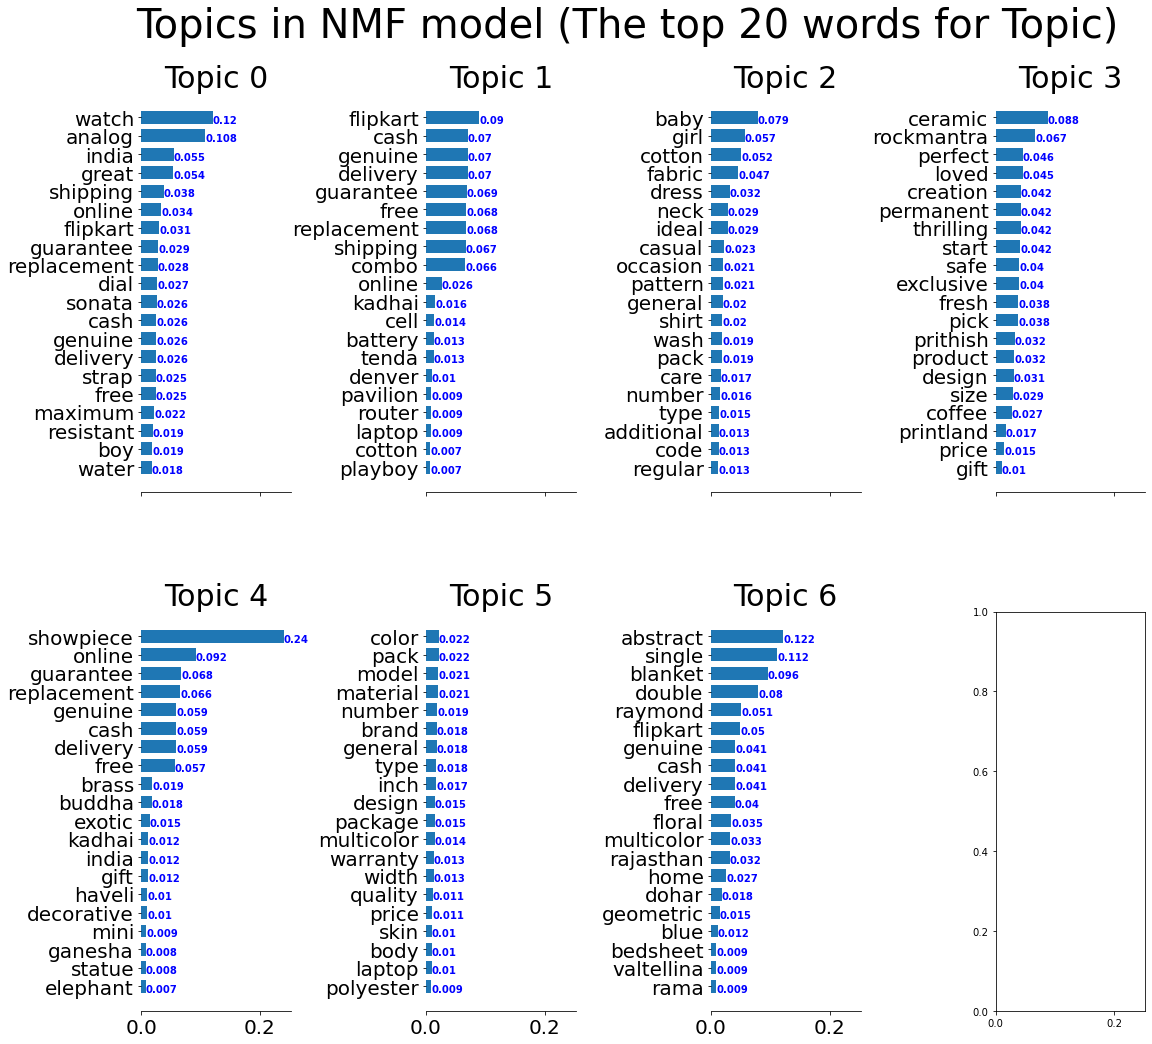

In [88]:
# Afficher topics
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(
    model_nmf, tfidf_feature_names, 20, "Topics in NMF model (The top 20 words for Topic)"
)

In [317]:
X = data[["dominant_topic_NMF"]]
y = data["category_1"]

# séparer nos données entre données d'entrainement et données de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
# Chercher le meilleur modèle et optimer ses hyperparamètres
# avec GridSearch pour prédir la catégorie à partir du topic NMF
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression          
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from time import time

names = ["Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "RBF SVM",
         "Neural Net", "AdaBoost", "Naive Bayes", "LDA", "QDA", "GradientBoosting"]

N_JOBS=24
rs = np.random.RandomState(2)

classifiers = [
    GridSearchCV(KNeighborsClassifier(),
                 param_grid={'n_neighbors': [2, 4, 6, 8, 10, 15, 20, 50, 100]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(DecisionTreeClassifier(random_state=rs),
                 param_grid={'max_depth': [2, 4, 6, 8, 10]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(RandomForestClassifier(random_state=rs),
                 param_grid={'max_depth': [2, 4, 6],
                             'n_estimators': [100, 250, 300],
                             'max_features': [4, 5, 6, 'sqrt'],
                             'min_samples_leaf': [25, 30]}, 
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(LogisticRegression(max_iter=1000, random_state=rs),
                 param_grid={'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e5, 1e10],
                             'penalty': ['none', 'l2']},
                 refit=True, cv=3, n_jobs=N_JOBS),
   
    GridSearchCV(SVC(kernel='rbf', random_state=rs, 
                     class_weight='balanced'),
                 param_grid={'C': [0.1, 1, 2, 2.2, 2.5, 2.7, 3, 5, 10]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(MLPClassifier(max_iter=1000, random_state=rs),
                 param_grid={'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e3],
                             'hidden_layer_sizes': [(50,50,50), (100, 100, 100), (100,)],
                             'activation': ['tanh', 'relu'],
                             'learning_rate': ['constant','adaptive']},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                                    random_state=rs, n_estimators=200),
                 param_grid={'n_estimators': [10, 20, 50, 100],
                             'learning_rate': [0.01, 0.1, 0.5, 1, 10]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(GaussianNB(),
                 param_grid={'var_smoothing': [1e-9, 1e-8, 1e-5, 1e-1]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(LinearDiscriminantAnalysis(),
                param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                           'shrinkage': ['auto', 0, 0.5, 1],
                           'tol': [1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(QuadraticDiscriminantAnalysis(),
                param_grid={'reg_param': [0.0, 0.01, 0.05, 0.1, 0.5],
                           'tol': [1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(GradientBoostingClassifier(random_state=rs),
                param_grid={'learning_rate': [0.01, 0.1, 0.2],
                           'n_estimators': [50, 100, 200, 500],
                           'max_depth': [3, 5, 10, 20, 30]},
                 refit=True, cv=3, n_jobs=N_JOBS)
]

clf_trained_dict = {}
preds = {}

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    print(f"Evaluating classifier: {name}")

    scaler = StandardScaler()  # Scale to mean = 0 and std_dev = 1
    X_train_scaled = scaler.fit_transform(X_train) # Fit to training data
    
    # Fit the classifer on the tranining set
    t0 = time()
    clf.fit(X_train_scaled, y_train)
    print("Training time:", round(time()-t0, 4), "s")

    # Make predictions on the training set
    t1 = time()
    predictions = clf.predict(X_train_scaled)
    print("Prediction time:", round(time()-t1, 4), "s")

    # Evaluate classifier
    print(f"The best parameters are {clf.best_params_} (score = {clf.best_score_:2f}) \n")
    print("Grid scores on training set:", "\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    # Save predictions and classifier
    preds[f'{name}'] = predictions
    clf_trained_dict[f'{name}'] = clf

Evaluating classifier: Nearest Neighbors
Training time: 38.7203 s
Prediction time: 0.065 s
The best parameters are {'n_neighbors': 8} (score = 0.592857) 

Grid scores on training set: 

0.545 (+/-0.075) for {'n_neighbors': 2}
0.579 (+/-0.006) for {'n_neighbors': 4}
0.575 (+/-0.012) for {'n_neighbors': 6}
0.593 (+/-0.027) for {'n_neighbors': 8}
0.588 (+/-0.028) for {'n_neighbors': 10}
0.592 (+/-0.022) for {'n_neighbors': 15}
0.582 (+/-0.006) for {'n_neighbors': 20}
0.593 (+/-0.027) for {'n_neighbors': 50}
0.531 (+/-0.013) for {'n_neighbors': 100}

Evaluating classifier: Decision Tree
Training time: 0.2599 s
Prediction time: 0.001 s
The best parameters are {'max_depth': 4} (score = 0.600000) 

Grid scores on training set: 

0.358 (+/-0.034) for {'max_depth': 2}
0.600 (+/-0.010) for {'max_depth': 4}
0.596 (+/-0.017) for {'max_depth': 6}
0.596 (+/-0.017) for {'max_depth': 8}
0.596 (+/-0.017) for {'max_depth': 10}

Evaluating classifier: Random Forest
Training time: 28.8276 s
Prediction tim

Training time: 1.0279 s
Prediction time: 0.001 s
The best parameters are {'C': 1e-05, 'penalty': 'none'} (score = 0.504762) 

Grid scores on training set: 

0.505 (+/-0.041) for {'C': 1e-05, 'penalty': 'none'}
0.154 (+/-0.000) for {'C': 1e-05, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 0.0001, 'penalty': 'none'}
0.154 (+/-0.000) for {'C': 0.0001, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 0.001, 'penalty': 'none'}
0.170 (+/-0.058) for {'C': 0.001, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 0.01, 'penalty': 'none'}
0.329 (+/-0.136) for {'C': 0.01, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 0.1, 'penalty': 'none'}
0.396 (+/-0.052) for {'C': 0.1, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 1, 'penalty': 'none'}
0.505 (+/-0.041) for {'C': 1, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 10.0, 'penalty': 'none'}
0.505 (+/-0.041) for {'C': 10.0, 'penalty': 'l2'}
0.505 (+/-0.041) for {'C': 100000.0, 'penalty': 'none'}
0.505 (+/-0.041) for {'C': 100000.0, 'penalty': 'l2'}
0.505 (+/-0.041) fo

Training time: 4.5442 s
Prediction time: 0.0156 s
The best parameters are {'learning_rate': 0.01, 'n_estimators': 10} (score = 0.600000) 

Grid scores on training set: 

0.600 (+/-0.010) for {'learning_rate': 0.01, 'n_estimators': 10}
0.600 (+/-0.010) for {'learning_rate': 0.01, 'n_estimators': 20}
0.593 (+/-0.027) for {'learning_rate': 0.01, 'n_estimators': 50}
0.593 (+/-0.027) for {'learning_rate': 0.01, 'n_estimators': 100}
0.593 (+/-0.010) for {'learning_rate': 0.1, 'n_estimators': 10}
0.593 (+/-0.010) for {'learning_rate': 0.1, 'n_estimators': 20}
0.589 (+/-0.020) for {'learning_rate': 0.1, 'n_estimators': 50}
0.593 (+/-0.010) for {'learning_rate': 0.1, 'n_estimators': 100}
0.596 (+/-0.017) for {'learning_rate': 0.5, 'n_estimators': 10}
0.596 (+/-0.017) for {'learning_rate': 0.5, 'n_estimators': 20}
0.506 (+/-0.128) for {'learning_rate': 0.5, 'n_estimators': 50}
0.462 (+/-0.007) for {'learning_rate': 0.5, 'n_estimators': 100}
0.593 (+/-0.027) for {'learning_rate': 1, 'n_estimators

In [314]:
# Le meilleur modèle selectionné
best_model_knn_topic_to_category = KNeighborsClassifier(n_neighbors=8, weights='uniform')
best_model_knn_topic_to_category.fit(X_train, y_train)
y_category_pred_by_NMF = best_model_knn_topic_to_category.predict(X_test)
print("Accuracy for KNN  on CV data: ", accuracy_score(y_test, y_category_pred_by_NMF))
print("Precision for KNN on CV data: ", precision_score(y_test, y_category_pred_by_NMF, average='macro'))
print("ARI for KNN on CV data: ", metrics.adjusted_rand_score(y_test, y_category_pred_by_NMF))

Accuracy for KNN  on CV data:  0.5666666666666667
Precision for KNN on CV data:  0.7648307970715298
ARI for KNN on CV data:  0.326521622232741


Rappel: 0.5866666666666667
Accuracy: 0.5866666666666667
Precision: 0.7579718089713143
F-mesure: 0.6230869302734143
adjusted_rand_score: 0.3309533275643167


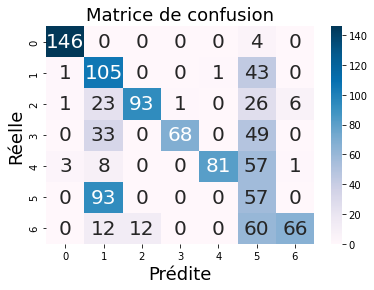

None


In [307]:
# Evaluation modèle NMF
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
import seaborn as sns
print(evaluation(y_test, y_category_pred_by_NMF))

In [91]:
# Define functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [92]:
from collections import Counter
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [93]:
nmf_keys = get_keys(vocabulary_NMF)
nmf_categories, nmf_counts = keys_to_counts(nmf_keys)

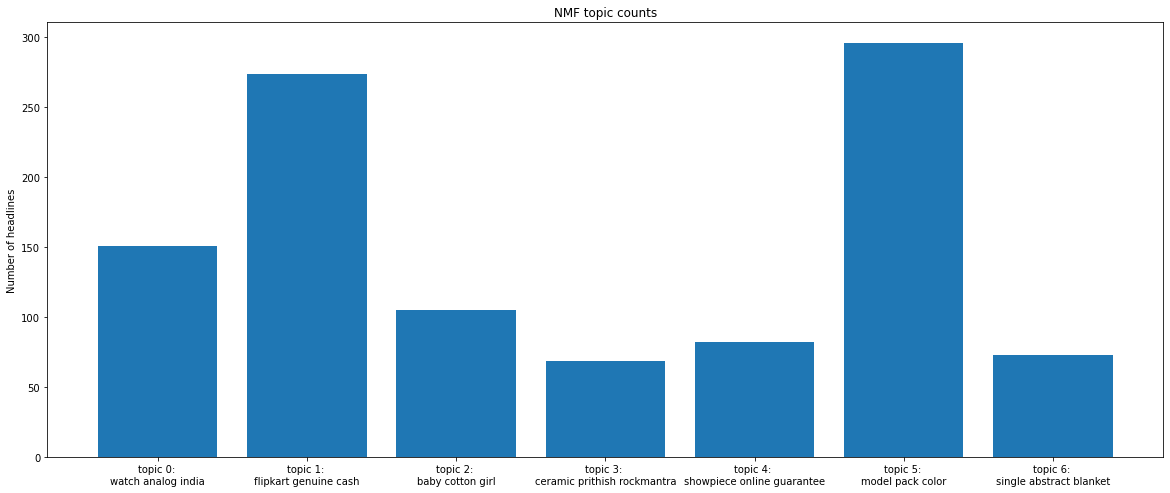

In [94]:
# Visualisation
n_topics = 7
top_3_words = get_top_n_words(3, nmf_keys, X_tfidf, tfidf_vectorizer)
labels = ['topic {}: \n'.format(i) + top_3_words[i] for i in nmf_categories]

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(nmf_categories, nmf_counts);
ax.set_xticks(nmf_categories);
ax.set_xticklabels(labels);
ax.set_title('NMF topic counts');
ax.set_ylabel('Number of headlines');

In [98]:
# Exportation
np.savetxt("vocabulary_NMF.csv", vocabulary_NMF)

In [99]:
# 3-Représenter le corpus avec Latent Dirichlet Allocation (LDA)

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#  tf-idf vectorizer
count_vectorizer = CountVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.95,
    min_df=3,
    ngram_range=(1, 1),
)
corpus = data['descriptions_cleaned2']

In [101]:
# fit le modèle
tf_count = count_vectorizer.fit_transform(corpus)

In [102]:
model_lda = LatentDirichletAllocation(
    n_components=7, 
    max_iter=5, learning_method='online',
    learning_offset=50.,random_state=0)

In [103]:
model_lda = model_lda.fit(tf_count)
vocabulary_LDA = model_lda.transform(tf_count)
# column names
topicnames = ["topic" + str(i) for i in range(7)]

# index names
docnames = ["doc" + str(i) for i in range(len(data))]

# dataframe
data_document_topic_LDA = pd.DataFrame(np.round(vocabulary_LDA, 2), columns=topicnames, index=docnames)

# topic dominant pour chaque document
dominant_topic_LDA = np.argmax(data_document_topic_LDA.values, axis=1)
data_document_topic_LDA['dominant_topic_LDA'] = dominant_topic_LDA
data_document_topic_LDA

topic0  topic1  topic2  topic3  topic4  topic5  topic6  \
doc0       0.08    0.00    0.15    0.11    0.00    0.63    0.03   
doc1       0.00    0.00    0.00    0.54    0.00    0.00    0.44   
doc2       0.00    0.00    0.00    0.39    0.00    0.16    0.45   
doc3       0.04    0.00    0.00    0.00    0.00    0.00    0.95   
doc4       0.13    0.00    0.00    0.00    0.00    0.00    0.86   
doc5       0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc6       0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc7       0.01    0.29    0.01    0.01    0.68    0.01    0.01   
doc8       0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc9       0.01    0.92    0.01    0.01    0.06    0.01    0.01   
doc10      0.05    0.31    0.00    0.00    0.00    0.00    0.63   
doc11      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc12      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc13      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc14      0.01    0.92    0.05    0.01    0.01    0.01    0.01   
doc15      0.08    0.56    0.15    0.01    0.01    0.01    0.20   
doc16      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc17      0.01    0.86    0.11    0.01    0.01    0.01    0.01   
doc18      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc19      0.00    0.97    0.00    0.00    0.00    0.00    0.00   
doc20      0.00    0.98    0.00    0.00    0.00    0.00    0.00   
doc21      0.01    0.80    0.17    0.01    0.01    0.01    0.01   
doc22      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc23      0.01    0.97    0.01    0.01    0.01    0.01    0.01   
doc24      0.00    0.85    0.12    0.00    0.00    0.00    0.00   
doc25      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc26      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc27      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc28      0.00    0.25    0.00    0.00    0.65    0.00    0.09   
doc29      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc30      0.00    0.97    0.00    0.00    0.00    0.00    0.00   
doc31      0.01    0.91    0.06    0.01    0.01    0.01    0.01   
doc32      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc33      0.00    0.00    0.00    0.00    0.00    0.00    0.99   
doc34      0.00    0.00    0.00    0.05    0.00    0.00    0.94   
doc35      0.01    0.63    0.01    0.32    0.01    0.01    0.01   
doc36      0.00    0.00    0.14    0.70    0.00    0.16    0.00   
doc37      0.00    0.09    0.15    0.00    0.26    0.00    0.50   
doc38      0.00    0.00    0.38    0.00    0.28    0.00    0.33   
doc39      0.00    0.00    0.00    0.00    0.00    0.00    0.97   
doc40      0.00    0.00    0.00    0.00    0.00    0.00    0.98   
doc41      0.01    0.01    0.01    0.01    0.01    0.01    0.97   
doc42      0.00    0.00    0.00    0.00    0.00    0.00    0.98   
doc43      0.00    0.00    0.98    0.00    0.00    0.00    0.00   
doc44      0.00    0.00    0.88    0.00    0.00    0.00    0.11   
doc45      0.00    0.00    0.88    0.00    0.00    0.00    0.11   
doc46      0.00    0.00    0.88    0.00    0.00    0.00    0.11   
doc47      0.00    0.00    0.00    0.00    0.98    0.00    0.00   
doc48      0.00    0.00    0.89    0.00    0.00    0.00    0.10   
doc49      0.01    0.01    0.89    0.01    0.01    0.01    0.09   
doc50      0.00    0.00    0.90    0.00    0.00    0.00    0.10   
doc51      0.00    0.00    0.00    0.00    0.99    0.00    0.00   
doc52      0.00    0.00    0.59    0.00    0.00    0.00    0.39   
doc53      0.00    0.00    0.00    0.98    0.00    0.00    0.00   
doc54      0.00    0.00    0.00    0.98    0.00    0.00    0.00   
doc55      0.00    0.00    0.00    0.98    0.00    0.00    0.00   
doc56      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc57      0.01    0.64    0.01    0.01    0.01    0.01    0.33   
doc58      0.00    0.62    0.00    0.00    0.00    0.00 

In [104]:
# Fit le modèle
model_lda = model_lda.fit(tf_count)

In [105]:
vocabulary_LDA = model_lda.transform(tf_count)

In [106]:
# Déterminer le topic dominant pour chaque document

In [107]:
# column names
topicnames = ["topic" + str(i) for i in range(7)]

# index names
docnames = ["doc" + str(i) for i in range(len(data))]

# dataframe
data_document_topic_LDA = pd.DataFrame(np.round(vocabulary_LDA, 2), columns=topicnames, index=docnames)

# topic dominant pour chaque document
dominant_topic_LDA = np.argmax(data_document_topic_LDA.values, axis=1)
data_document_topic_LDA['dominant_topic_LDA'] = dominant_topic_LDA

In [108]:
data_document_topic_LDA

topic0  topic1  topic2  topic3  topic4  topic5  topic6  \
doc0       0.08    0.00    0.15    0.11    0.00    0.63    0.03   
doc1       0.00    0.00    0.00    0.54    0.00    0.00    0.44   
doc2       0.00    0.00    0.00    0.39    0.00    0.16    0.45   
doc3       0.04    0.00    0.00    0.00    0.00    0.00    0.95   
doc4       0.13    0.00    0.00    0.00    0.00    0.00    0.86   
doc5       0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc6       0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc7       0.01    0.29    0.01    0.01    0.68    0.01    0.01   
doc8       0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc9       0.01    0.92    0.01    0.01    0.06    0.01    0.01   
doc10      0.05    0.31    0.00    0.00    0.00    0.00    0.63   
doc11      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc12      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc13      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc14      0.01    0.92    0.05    0.01    0.01    0.01    0.01   
doc15      0.08    0.56    0.15    0.01    0.01    0.01    0.20   
doc16      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc17      0.01    0.86    0.11    0.01    0.01    0.01    0.01   
doc18      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc19      0.00    0.97    0.00    0.00    0.00    0.00    0.00   
doc20      0.00    0.98    0.00    0.00    0.00    0.00    0.00   
doc21      0.01    0.80    0.17    0.01    0.01    0.01    0.01   
doc22      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc23      0.01    0.97    0.01    0.01    0.01    0.01    0.01   
doc24      0.00    0.85    0.12    0.00    0.00    0.00    0.00   
doc25      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc26      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc27      0.01    0.96    0.01    0.01    0.01    0.01    0.01   
doc28      0.00    0.25    0.00    0.00    0.65    0.00    0.09   
doc29      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc30      0.00    0.97    0.00    0.00    0.00    0.00    0.00   
doc31      0.01    0.91    0.06    0.01    0.01    0.01    0.01   
doc32      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc33      0.00    0.00    0.00    0.00    0.00    0.00    0.99   
doc34      0.00    0.00    0.00    0.05    0.00    0.00    0.94   
doc35      0.01    0.63    0.01    0.32    0.01    0.01    0.01   
doc36      0.00    0.00    0.14    0.70    0.00    0.16    0.00   
doc37      0.00    0.09    0.15    0.00    0.26    0.00    0.50   
doc38      0.00    0.00    0.38    0.00    0.28    0.00    0.33   
doc39      0.00    0.00    0.00    0.00    0.00    0.00    0.97   
doc40      0.00    0.00    0.00    0.00    0.00    0.00    0.98   
doc41      0.01    0.01    0.01    0.01    0.01    0.01    0.97   
doc42      0.00    0.00    0.00    0.00    0.00    0.00    0.98   
doc43      0.00    0.00    0.98    0.00    0.00    0.00    0.00   
doc44      0.00    0.00    0.88    0.00    0.00    0.00    0.11   
doc45      0.00    0.00    0.88    0.00    0.00    0.00    0.11   
doc46      0.00    0.00    0.88    0.00    0.00    0.00    0.11   
doc47      0.00    0.00    0.00    0.00    0.98    0.00    0.00   
doc48      0.00    0.00    0.89    0.00    0.00    0.00    0.10   
doc49      0.01    0.01    0.89    0.01    0.01    0.01    0.09   
doc50      0.00    0.00    0.90    0.00    0.00    0.00    0.10   
doc51      0.00    0.00    0.00    0.00    0.99    0.00    0.00   
doc52      0.00    0.00    0.59    0.00    0.00    0.00    0.39   
doc53      0.00    0.00    0.00    0.98    0.00    0.00    0.00   
doc54      0.00    0.00    0.00    0.98    0.00    0.00    0.00   
doc55      0.00    0.00    0.00    0.98    0.00    0.00    0.00   
doc56      0.01    0.95    0.01    0.01    0.01    0.01    0.01   
doc57      0.01    0.64    0.01    0.01    0.01    0.01    0.33   
doc58      0.00    0.62    0.00    0.00    0.00    0.00 

In [109]:
# Créons une nouvelle colonne qui correspondra 
# à la valeur du topic à laquel appartient chaque document.
data["dominant_topic_LDA"] = vocabulary_LDA.argmax(axis=1)

In [110]:
# Affichons les poids d'appartenir à tel 
# topic pour chaque mot du dictionnaire

In [111]:
topicnames_lda = ["Topic" + str(i) for i in range(7)]
# Matrice avec mots clés des topics
normalised_weights = model_lda.components_ / model_lda.components_.sum(axis=1)[:, np.newaxis]
df_topic_keywords_lda = pd.DataFrame(normalised_weights)
#df_topic_keywords_lda = pd.DataFrame(model_lda.components_)
df_topic_keywords_lda = df_topic_keywords_lda.transpose()
# Assigner Colonnes et Index
df_topic_keywords_lda.index = count_vectorizer.get_feature_names()
df_topic_keywords_lda.columns = topicnames_lda
df_topic_keywords_lda

Topic0    Topic1    Topic2    Topic3    Topic4    Topic5  \
aapno           0.000208  0.000088  0.000073  0.000052  0.000061  0.001806   
abkl            0.000196  0.000033  0.000075  0.002446  0.000049  0.000049   
able            0.000233  0.000044  0.000134  0.000052  0.001150  0.000128   
absorbent       0.001084  0.000031  0.000073  0.000958  0.000054  0.000055   
abstract        0.037442  0.002708  0.000277  0.000602  0.000054  0.000513   
actual          0.000196  0.000033  0.000098  0.000058  0.003609  0.000079   
adapter         0.000199  0.000036  0.000079  0.000053  0.018675  0.002132   
adaptor         0.000193  0.000033  0.000094  0.000055  0.001645  0.000055   
addition        0.000196  0.000040  0.001818  0.000832  0.000114  0.000051   
additional      0.000239  0.000070  0.000128  0.001046  0.000891  0.000069   
adhesive        0.000209  0.000071  0.000077  0.008830  0.000053  0.000051   
adidas          0.000191  0.001799  0.000078  0.000052  0.000056  0.000051   
adjustable      0.000173  0.000036  0.000075  0.000083  0.000650  0.000285   
adorable        0.000198  0.000030  0.006346  0.000124  0.000069  0.000129   
adsl            0.000212  0.000696  0.000074  0.000053  0.000052  0.000046   
advice          0.000181  0.000034  0.000094  0.000060  0.001513  0.000047   
aero            0.000206  0.000803  0.000075  0.000054  0.000051  0.000049   
affordable      0.017475  0.000034  0.000284  0.000057  0.000058  0.000047   
akup            0.000185  0.000033  0.008072  0.000055  0.000049  0.000050   
alarm           0.000177  0.000374  0.000121  0.000051  0.000661  0.000078   
almond          0.000213  0.000066  0.000075  0.000063  0.000049  0.004533   
aloevera        0.000419  0.000508  0.000079  0.000055  0.000054  0.002521   
aluminium       0.000223  0.000145  0.000564  0.003070  0.000164  0.000058   
amazing         0.000181  0.000031  0.000165  0.000064  0.001397  0.000060   
analog          0.000190  0.041716  0.000311  0.000054  0.000123  0.000048   
andre           0.000236  0.001093  0.000073  0.000060  0.000069  0.000049   
android         0.000180  0.000037  0.000073  0.004241  0.000522  0.000166   
angel           0.000190  0.000041  0.000076  0.000385  0.000684  0.000050   
animal          0.000185  0.000555  0.000074  0.000554  0.000057  0.000097   
anna            0.000247  0.001093  0.000072  0.000052  0.000066  0.000051   
anti            0.000192  0.000053  0.000074  0.000097  0.000051  0.004687   
antique         0.000196  0.000096  0.000088  0.000099  0.004922  0.000238   
antiqueshop     0.000187  0.000032  0.000074  0.004239  0.000050  0.000050   
appeal          0.000196  0.000060  0.001599  0.000065  0.000068  0.000065   
appearance      0.000186  0.000035  0.000075  0.000050  0.001749  0.000176   
apple           0.000220  0.001416  0.000135  0.000061  0.000058  0.004993   
approx          0.000180  0.000033  0.000081  0.000059  0.000635  0.000047   
arabian         0.002556  0.000362  0.000080  0.000059  0.000053  0.000229   
area            0.000275  0.000037  0.000087  0.002264  0.002473  0.000626   
aroma           0.000222  0.000061  0.000078  0.000062  0.000059  0.023310   
artificial      0.000196  0.000037  0.000087  0.003834  0.000081  0.000048   
artist          0.000239  0.000055  0.000251  0.001595  0.000074  0.000051   
artistic        0.000190  0.000035  0.000437  0.000375  0.000800  0.000052   
assembly        0.000193  0.000032  0.000120  0.000053  0.000078  0.000052   
assure          0.000183  0.000032  0.000075  0.000056  0.001092  0.000093   
asus            0.000200  0.001468  0.000075  0.000155  0.000859  0.000051   
attention       0.000212  0.000042  0.000097  0.000503  0.000206  0.000130   
attitude        0.000180  0.000031  0.000087  0.002071  0.000054  0.000047   
attivo          0.000202  0.001094  0.000072  0.000056  0.000049  0.000052   
attractive      0.015582  0.000083  0.000343  0.000826  0.001371  0.000049   
audio           0.000189  0.000043  0.00

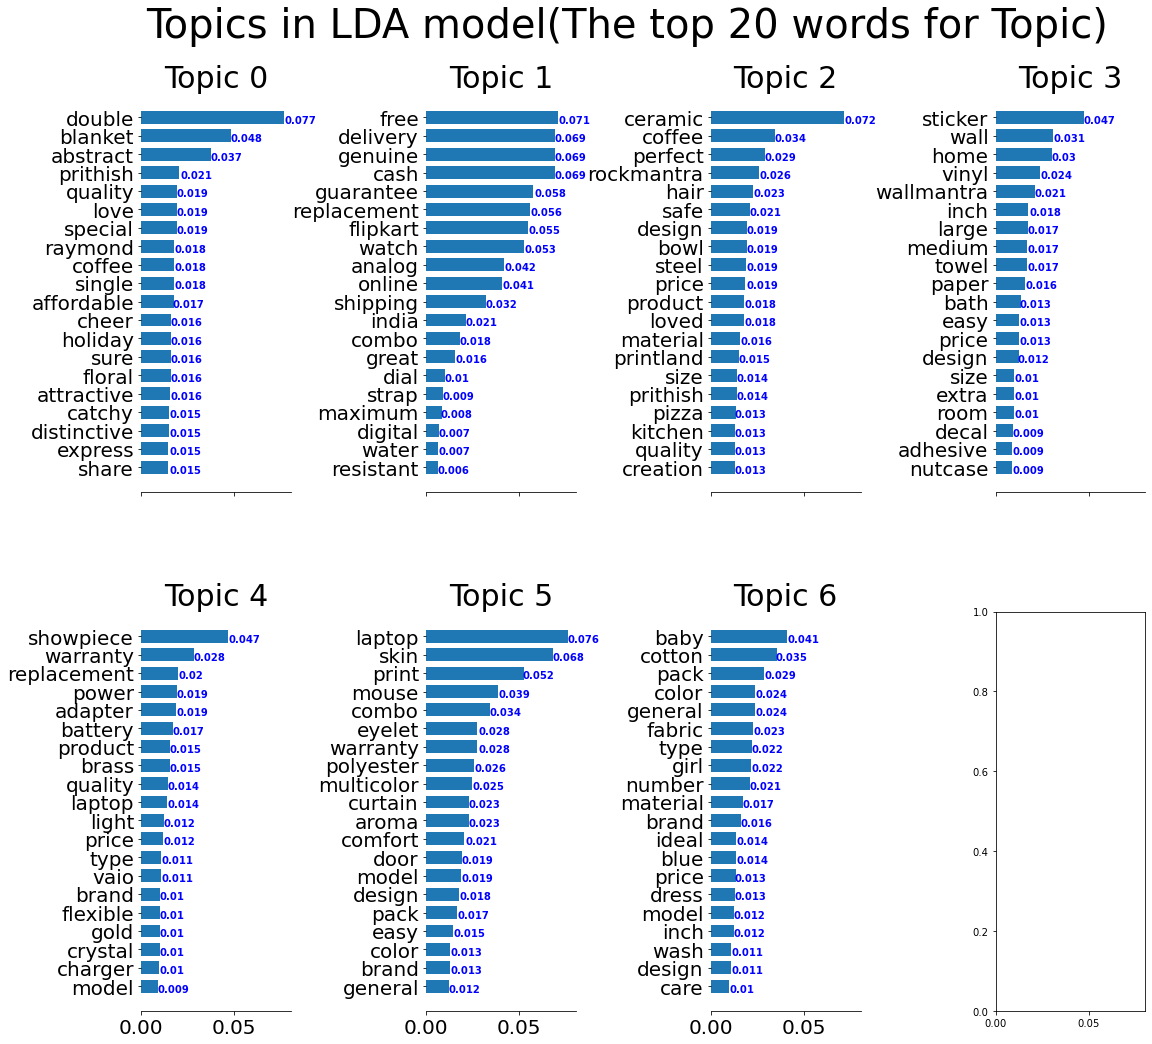

In [112]:
# afficher topics
tf_feature_names = count_vectorizer.get_feature_names()
plot_top_words(model_lda, tf_feature_names, 20, "Topics in LDA model(The top 20 words for Topic)")

In [113]:
# Attribuer à chaque valeur de catecory_1 le topic avec LDA correspondant

def class_category(row):
    if row["category_1"] == 'Baby Care':
        category_1_true_topic = 6
    elif row["category_1"] == 'Beauty and Personal Care':
        category_1_true_topic = 0
    elif row["category_1"] == 'Computers':
        category_1_true_topic = 5
    elif row["category_1"] == 'Home Decor & Festive Needs':
        category_1_true_topic = 4
    elif row["category_1"] == 'Home Furnishing':
        category_1_true_topic = 3
    elif row["category_1"] == 'Kitchen & Dining':
        category_1_true_topic = 2        
    else:
        category_1_true_topic = 1
        
    return category_1_true_topic

data['category_topic_LDA_true'] = data.apply(lambda row: class_category(row),axis=1)

In [114]:
lda_keys = get_keys(vocabulary_LDA)
lda_categories, lda_counts = keys_to_counts(lda_keys)

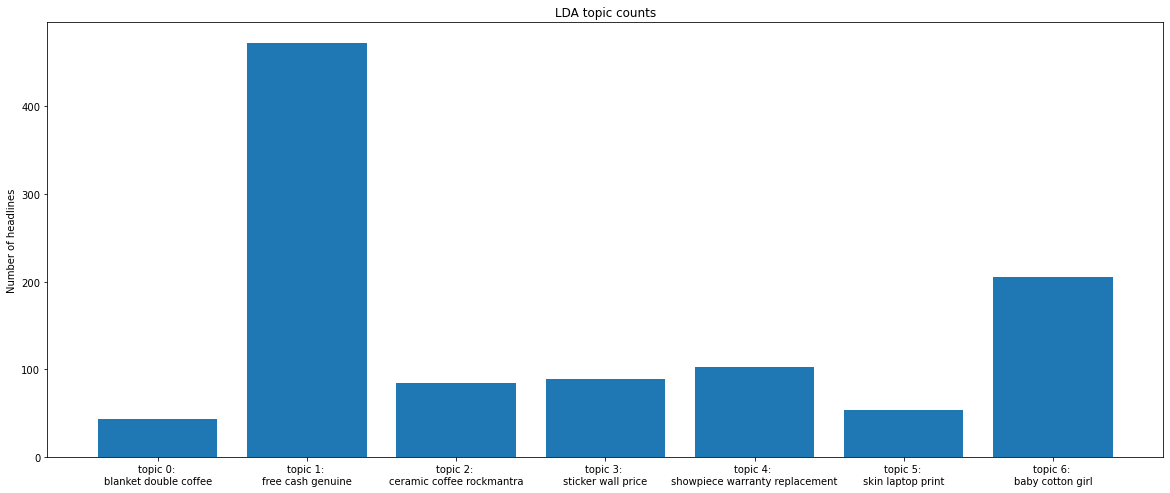

In [115]:
n_topics = 7
top_3_words = get_top_n_words(3, lda_keys, tf_count, count_vectorizer)
labels = ['topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [116]:
vocabulary_LDA.shape

(1050, 7)

In [117]:
# EXportation
np.savetxt("vocabulary_LDA.csv", vocabulary_LDA)

Rappel: 0.38476190476190475
Accuracy: 0.38476190476190475
Precision: 0.3817969870820792
F-mesure: 0.33966777722459224
adjusted_rand_score: 0.14564541568143144


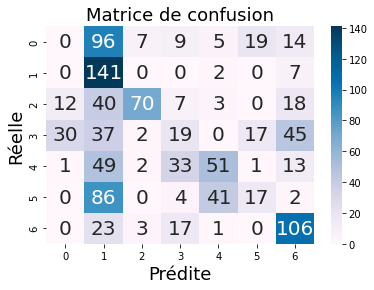

None


In [118]:
# Evaluation modèle LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
import seaborn as sns
print(evaluation(data['category_topic_LDA_true'], data['dominant_topic_LDA']))

In [119]:
# on va utiliser le module pyldavis pour visualiser
# les topics associés aux documents.

In [122]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(model_lda, tf_count, count_vectorizer, mds='tsne') # Create the panel for the visualization
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6     -29.594002  60.112713       1        1  25.358868
1     -45.996586  11.891685       2        1  23.672821
4      20.368856  70.019325       3        1  16.085244
3      53.928768  31.704309       4        1  11.897874
2     -12.437127 -26.423267       5        1  10.795502
5       3.965971  21.797720       6        1   7.698022
0      37.524284 -16.517805       7        1   4.491669, topic_info=               Term        Freq       Total Category  logprob  loglift
109            cash  540.000000  540.000000  Default  30.0000  30.0000
342         genuine  540.000000  540.000000  Default  29.0000  29.0000
213        delivery  543.000000  543.000000  Default  28.0000  28.0000
364       guarantee  449.000000  449.000000  Default  27.0000  27.0000
308        flipkart  428.000000  428.000000  Default  26.0000  26.0000
115         ceramic  257.000000  257.000000  Default  25.0000  25.0000
439          laptop  276.000000  276.000000  Default  24.0000  24.0000
890           watch  416.000000  416.000000  Default  23.0000  23.0000
325            free  605.000000  605.000000  Default  22.0000  22.0000
677     replacement  542.000000  542.000000  Default  21.0000  21.0000
753            skin  195.000000  195.000000  Default  20.0000  20.0000
24           analog  324.000000  324.000000  Default  19.0000  19.0000
56             baby  341.000000  341.000000  Default  18.0000  18.0000
743       showpiece  260.000000  260.000000  Default  17.0000  17.0000
547          online  324.000000  324.000000  Default  16.0000  16.0000
790         sticker  185.000000  185.000000  Default  15.0000  15.0000
630           print  211.000000  211.000000  Default  14.0000  14.0000
243          double  125.000000  125.000000  Default  13.0000  13.0000
735        shipping  252.000000  252.000000  Default  12.0000  12.0000
150           combo  232.000000  232.000000  Default  11.0000  11.0000
181          cotton  302.000000  302.000000  Default  10.0000  10.0000
887        warranty  247.000000  247.000000  Default   9.0000   9.0000
140          coffee  147.000000  147.000000  Default   8.0000   8.0000
517           mouse   99.000000   99.000000  Default   7.0000   7.0000
881            wall  133.000000  133.000000  Default   6.0000   6.0000
284          fabric  189.000000  189.000000  Default   5.0000   5.0000
76          blanket   73.000000   73.000000  Default   4.0000   4.0000
347            girl  180.000000  180.000000  Default   3.0000   3.0000
4          abstract   81.000000   81.000000  Default   2.0000   2.0000
579         perfect  140.000000  140.000000  Default   1.0000   1.0000
56             baby  337.602052  341.040008   Topic1  -3.1963   1.3619
347            girl  178.038534  180.390533   Topic1  -3.8362   1.3589
284          fabric  186.014642  189.318682   Topic1  -3.7924   1.3544
244           dress  106.215936  108.285600   Topic1  -4.3527   1.3527
736           shirt   70.311941   71.752707   Topic1  -4.7653   1.3518
530            neck   71.131726   72.805204   Topic1  -4.7537   1.3488
181          cotton  291.230084  302.842315   Topic1  -3.3441   1.3329
570            pant   33.604870   34.997940   Topic1  -5.5035   1.3314
185           cover   70.796469   73.841238   Topic1  -4.7584   1.3299
139            code   70.493062   73.571600   Topic1  -4.7627   1.3293
195         cushion   32.052100   33.602425   Topic1  -5.5509   1.3248
453            line   28.357432   29.738612   Topic1  -5.6733   1.3245
70         bedsheet   59.886214   62.865899   Topic1  -4.9258   1.3235
473         machine   38.932829   40.939446   Topic1  -5.3564   1.3218
458          little   23.587010   24.938886   Topic1  -5.8575   1.3163
430            klub   27.963368   29.609590   Topic1  -5.6873   1.3148
755          sleeve   23.408626   24.855903   Topic1  -5.8651   1.3121
649          pyjama   22.799702   24.235746  

In [124]:
# calculer le coherence score de chaque modèle NMF et LDA

In [125]:
dataset = [d.split() for d in data['descriptions_cleaned2']]

In [128]:
import gensim.corpora as corpora

In [129]:
# Créer Dictionnaire
id2word = corpora.Dictionary(dataset)

In [130]:
corpus2 = [id2word.doc2bow(text) for text in dataset]

In [131]:
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus2,
                                       id2word=id2word,
                                       num_topics=7, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [132]:
# Calculer Coherence Score du modèle LDA
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDA: ', coherence_lda)


Coherence Score LDA:  0.5025406220138576


In [133]:
import gensim.models
from gensim.models import Nmf
nmf_model = Nmf(
    corpus=corpus2,
    num_topics=7,
    id2word=id2word,
    chunksize=100,
    passes=10,
    eval_every=10,
    minimum_probability=0,
    random_state=100,
    kappa=1,
)

In [134]:
# Calculer Coherence Score du modèle NMF
coherence_model_nmf = CoherenceModel(model=nmf_model, texts=dataset, dictionary=id2word, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('\nCoherence Score NMF: ', coherence_nmf)


Coherence Score NMF:  0.6016721651121226


In [ ]:
# On constate que NMF est meilleur

In [135]:
# 4-Représenter le corpus avec embedding par réseau neuronal

In [141]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
# Représentation pour chaque message,
messages = list(data["descriptions_cleaned2"])
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    vocabulary_EMB = session.run(embed(messages))

In [142]:
vocabulary_EMB.shape

(1050, 512)

In [143]:
# EXportation
np.savetxt("vocabulary_EMB.csv", vocabulary_EMB)

In [144]:
# Réduction de dimensions par NMF

In [145]:
# vérifier que les features sont 'non-negative'
data_features_list = {'vocabulary_EMB':vocabulary_EMB, 'vocabulary_TFIDF':vocabulary_TFIDF,}
for key, value in data_features_list.items():
    print("All values are positive or null in {}: {}"
          .format(key, (value >= 0).all()))

All values are positive or null in vocabulary_EMB: False
All values are positive or null in vocabulary_TFIDF: aapno             True
abkl              True
able              True
absorbent         True
abstract          True
actual            True
adapter           True
adaptor           True
addition          True
additional        True
adhesive          True
adidas            True
adjustable        True
adorable          True
adsl              True
advice            True
aero              True
affordable        True
akup              True
alarm             True
almond            True
aloevera          True
aluminium         True
amazing           True
analog            True
andre             True
android           True
angel             True
animal            True
anna              True
anti              True
antique           True
antiqueshop       True
appeal            True
appearance        True
apple             True
approx            True
arabian           True
area            

In [146]:
def make_positive(matrix):
    """Convert a np.ndarray to a positive one
    (eg preprocessing for NMF)."""
    
    if (matrix >= 0).all():
        return matrix
    
    def make_positive_col(col):
        col_min = np.min(col)
        if col_min < 0:
            positive_col = col - col_min
            return positive_col
        elif col_min >= 0:
            return col
    
    positive_mat = np.apply_along_axis(make_positive_col, axis=1, arr=matrix)
    return positive_mat

In [147]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder, StandardScaler

vocabulary_EMB_positive = make_positive(vocabulary_EMB)
model = NMF(n_components=7, random_state=42)
vocabulary_EMB_NMF = model.fit_transform(vocabulary_EMB_positive)

In [148]:
columns = ['Column_' + str(i) 
          for i in range(1, len(vocabulary_EMB_NMF[0]) + 1)]
df_vocabulary_EMB_NMF = pd.DataFrame(vocabulary_EMB_NMF , 
                        columns = columns)

In [149]:
X_EMB = df_vocabulary_EMB_NMF
label_encoder=LabelEncoder()
y_EMB = data['category_1']
y_EMB = LabelEncoder().fit_transform(y_EMB)

Rappel: 0.7450400975166606
Accuracy: 0.7452471482889734
Precision: 0.7472093212840576
F-mesure: 0.7433675761509334
adjusted_rand_score: 0.5221764057749301


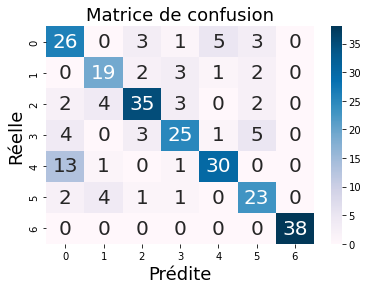

None
Training Accuracy: 0.999047114341232


Validation Accuracy: 0.7305409981456099




In [150]:
#Evaluation de DecisionTreeClassifier:
cross_val(DecisionTreeClassifier(), KFold(),X_EMB,y_EMB)

Rappel: 0.645072319258486
Accuracy: 0.6463878326996197
Precision: 0.6681609972014096
F-mesure: 0.6276395152065194
adjusted_rand_score: 0.45744430920909074


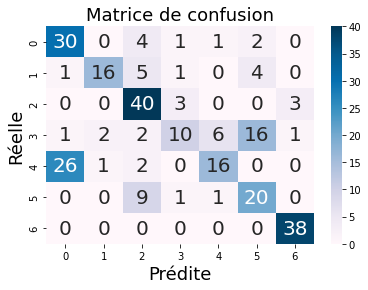

None
Training Accuracy: 0.6848729401670578


Validation Accuracy: 0.669644440861082




In [151]:
# Evaluation de SVM (multi-classes)
from sklearn.svm import LinearSVC
cross_val(LinearSVC(multi_class="crammer_singer"), KFold(),X_EMB,y_EMB)

Rappel: 0.7906158180241002
Accuracy: 0.7946768060836502
Precision: 0.7893281858326254
F-mesure: 0.7872726303225127
adjusted_rand_score: 0.6007838815440699


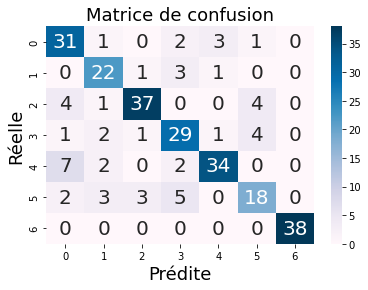

None
Training Accuracy: 0.843708582532112


Validation Accuracy: 0.7636378295573651




In [152]:
#Evaluation de KNeighborsClassifier:
cross_val(KNeighborsClassifier(), KFold(),X_EMB,y_EMB)

In [153]:
# le modèle selectionné est KNeighborsClassifier
#Prédiction des catégories avec KNeighborsClassifier 
knn = KNeighborsClassifier()
model = knn.fit(X_EMB, y_EMB)
category_1_pred_EMB= knn.predict(X_EMB)

#Ajouter les classes à notre jeu de données
data['category_1_pred_EMB_NMF'] = category_1_pred_EMB.tolist()
data[['category_1_pred_EMB_NMF']]=data[['category_1_pred_EMB_NMF']].astype('int64')

data.loc[0:10,['category_1', 'dominant_topic_NMF','category_1_pred_EMB_NMF']]

category_1  dominant_topic_NMF  category_1_pred_EMB_NMF
0   Home Furnishing                   5                        4
1         Baby Care                   5                        0
2         Baby Care                   5                        0
3   Home Furnishing                   5                        4
4   Home Furnishing                   5                        4
5           Watches                   0                        6
6           Watches                   0                        6
7           Watches                   0                        6
8           Watches                   0                        6
9           Watches                   0                        6
10          Watches                   0                        6

In [154]:
# Optimisation :

# Réduction de dimensions par PCA

In [155]:
def PCA_reduction(X_std, var_threshold=0.9, verbose=True):
    """Return the principal components from PCA, until variance threshold."""

    from sklearn import decomposition
    
    if verbose == True:
        print("Initial number of features:", X_std.shape[1])
    
    # Processing the PCA
    pca = decomposition.PCA()
    pca.fit(X_std)
    
    # Getting the explained variance ratio for each principal component
    scree = pca.explained_variance_ratio_

    # Getting the number of principal components to reach variance thresholds
    mask = scree.cumsum() > var_threshold
    nb_selected_features = len(scree[~mask]) + 1
    if verbose == True:
        print("Number of selected features:", nb_selected_features)
    
    # Compute and displays the actual ratio of explained variance
    explained_variance_sum = scree.cumsum()[nb_selected_features-1]
    if verbose == True:
        print("Cumulative explained variance:  {:.2f}%".format(explained_variance_sum*100))
    
    # Getting the projection of the data on the first components
    X_projected = pca.transform(X_std)[:,:nb_selected_features]
    
    return X_projected

In [156]:
vocabulary_EMB_std = StandardScaler().fit_transform(vocabulary_EMB)
# Appliquer la reduction de dimension (PCA)
vocabulary_EMB_PCA = PCA_reduction(vocabulary_EMB_std, var_threshold=0.9)

Initial number of features: 512
Number of selected features: 140
Cumulative explained variance:  90.03%


In [157]:
columns = ['Column_' + str(i) 
          for i in range(1, len(vocabulary_EMB_PCA[0]) + 1)]
df_vocabulary_EMB_PCA = pd.DataFrame(vocabulary_EMB_PCA , 
                        columns = columns)

In [158]:
X_EMB_PCA = df_vocabulary_EMB_PCA
label_encoder=LabelEncoder()
y_EMB_PCA = data['category_1']
y_EMB_PCA = LabelEncoder().fit_transform(y_EMB_PCA)

Rappel: 0.7081313615970737
Accuracy: 0.7110266159695817
Precision: 0.7046833240728804
F-mesure: 0.7048839128870862
adjusted_rand_score: 0.48056969747325073


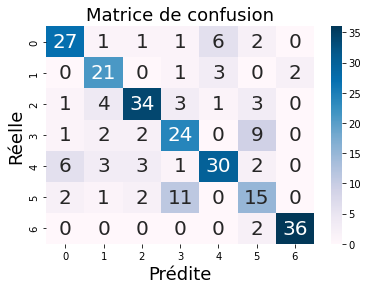

None
Training Accuracy: 0.999047114341232


Validation Accuracy: 0.7204305409981456




In [159]:
#Evaluation de DecisionTreeClassifier:
cross_val(DecisionTreeClassifier(), KFold(), X_EMB_PCA, y_EMB_PCA)

Rappel: 0.8606098384499506
Accuracy: 0.8631178707224335
Precision: 0.8577936702936704
F-mesure: 0.8587941396461206
adjusted_rand_score: 0.7232782251050658


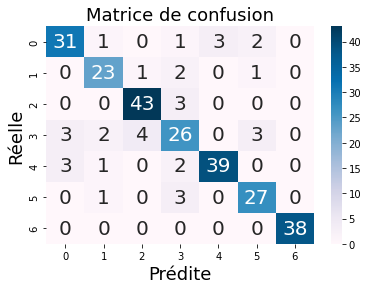

None
Training Accuracy: 0.999047114341232


Validation Accuracy: 0.8373216157381279




In [160]:
# Evaluation de SVM (multi-classes)
from sklearn.svm import LinearSVC
cross_val(LinearSVC(multi_class="crammer_singer"), KFold(), X_EMB_PCA, y_EMB_PCA)

Rappel: 0.889919828400673
Accuracy: 0.8897338403041825
Precision: 0.8875279990538726
F-mesure: 0.8873762926836787
adjusted_rand_score: 0.7648908786394373


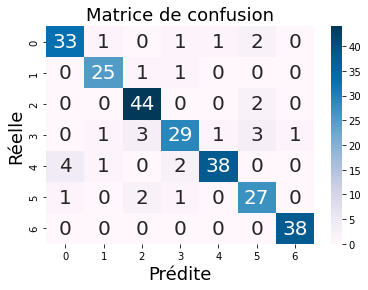

None
Training Accuracy: 0.9196325737502209


Validation Accuracy: 0.8767556236394419




In [161]:
#Evaluation de KNeighborsClassifier:
cross_val(KNeighborsClassifier(), KFold(), X_EMB_PCA, y_EMB_PCA)

In [162]:
# Réduction de dimension avec TSNE (2D)
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_EMB = tsne.fit_transform(X_EMB_PCA)

df_tsne_EMB = pd.DataFrame(X_tsne_EMB[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_EMB["class"] = data["category_1"]
print(df_tsne_EMB.shape)

(1050, 3)


In [163]:
df_tsne_EMB.describe()

tsne1        tsne2
count  1050.000000  1050.000000
mean      0.339815    -0.091626
std      22.223324    24.762405
min     -41.145859   -48.342476
25%     -19.709160   -20.308347
50%       2.627616     1.058689
75%      21.309073    17.600020
max      39.417908    48.901760

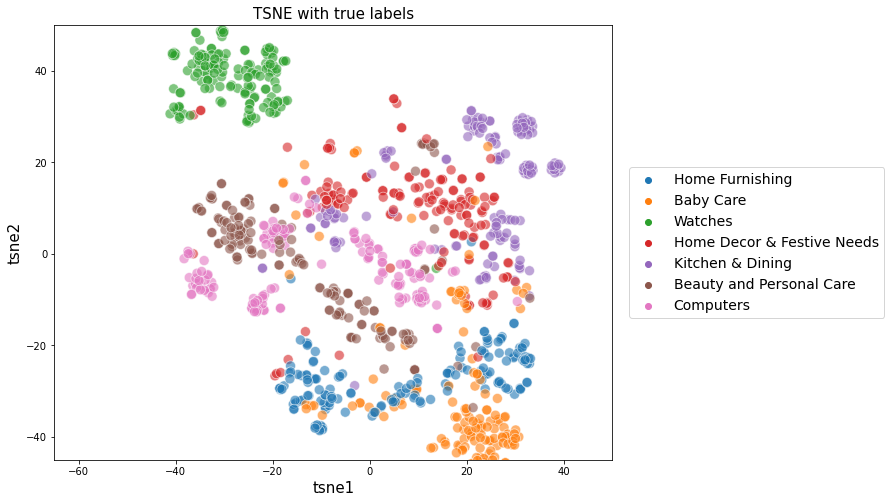

In [164]:
# Visualisation
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_tsne_EMB, s=100, alpha=0.6)
plt.title('TSNE with true labels', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))

plt.ylim(-45, 50)
plt.xlim(-65, 50)

plt.show()

In [165]:
# classification avec k-means
from sklearn import cluster, metrics

cls_EMB = cluster.KMeans(n_clusters=7, random_state=42)
cls_EMB.fit(X_tsne_EMB)

df_tsne_EMB["cluster"] = cls_EMB.labels_
print(df_tsne_EMB.shape)

(1050, 4)


In [166]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_tsne_EMB, cls_EMB.labels_)  
score

0.47318858

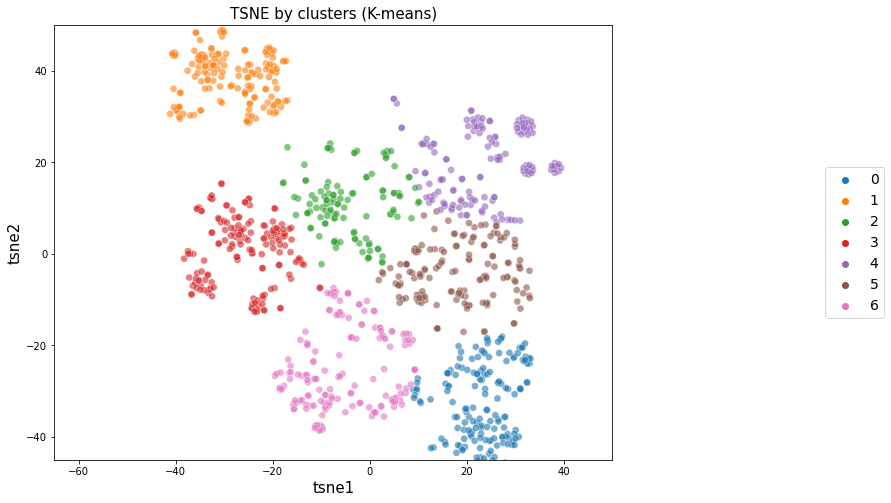

ARI :  0.3993193521881413


In [167]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne_EMB,
                legend="brief", s=50, alpha=0.6,
                palette=sns.color_palette('tab10', n_colors=7))

plt.title('TSNE by clusters (K-means)', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))


plt.ylim(-45, 50)
plt.xlim(-65, 50)

plt.show()

labels = data["category_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls_EMB.labels_))

In [168]:
# classification  KNN

In [169]:
# Maintenant on va essayer de réduire la dimension et de classifier avec KNeighborsClassifier
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_EMB_KNN = tsne.fit_transform(X_EMB_PCA)

df_tsne_EMB_KNN = pd.DataFrame(X_tsne_EMB[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne_EMB_KNN.shape)

(1050, 2)


In [170]:
X_EMB_PCA = df_vocabulary_EMB_PCA
label_encoder=LabelEncoder()
y_EMB_PCA = data['category_1']

In [171]:
knn = KNeighborsClassifier()
model = knn.fit(df_tsne_EMB_KNN, y_EMB_PCA)
category_1_pred_EMB_PCA= knn.predict(df_tsne_EMB_KNN)

# Ajouter les classes à une dataframe
df_tsne_EMB_KNN["cluster"] = category_1_pred_EMB_PCA
print(df_tsne_EMB_KNN.shape)

(1050, 3)


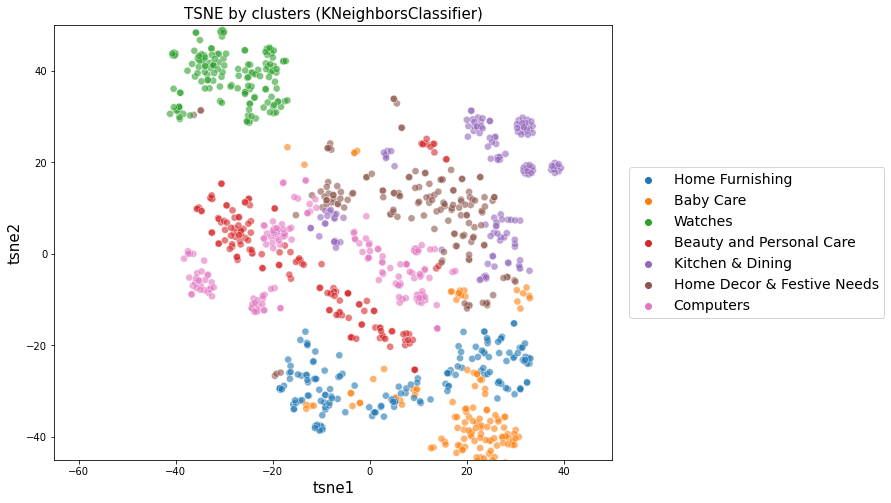

ARI :  0.8228510287086461


In [172]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne_EMB_KNN,
                legend="brief", s=50, alpha=0.6,
                palette=sns.color_palette('tab10', n_colors=7))

plt.title('TSNE by clusters (KNeighborsClassifier)', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))


plt.ylim(-45, 50)
plt.xlim(-65, 50)

plt.show()

labels = data["category_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, category_1_pred_EMB_PCA))

In [173]:
# le modèle selectionné est KNeighborsClassifier
# Prédiction des catégories avec KNeighborsClassifier
# après répresentation de corpus avec embedding par réseau neuronal
# et réduction de dimension par PCA 

In [174]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [175]:
# II-Extraction de features à partir des images :

In [176]:
# 1-Traitement d'images 

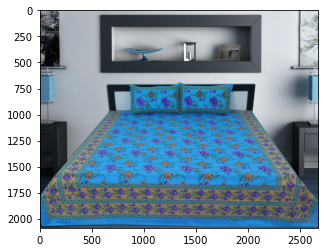

In [181]:
import cv2
import os
from matplotlib import pyplot as plt

# Exemple sur une image 
image_exemple = data['image'].loc[4]
dir_name = 'Flipkart/Images'
file_path = os.path.join(dir_name, image_exemple)
# Afficher l'image
img_exemple = cv2.imread(file_path)
plt.imshow(img_exemple)

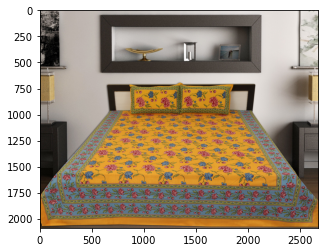

In [182]:
# Convertir l'image en image couleur
RGB_img_exemple = cv2.cvtColor(img_exemple, cv2.COLOR_BGR2RGB)
# Afficher image couleur
plt.imshow(RGB_img_exemple)

In [183]:
# Redimensionnement

In [184]:
def resize_image(img, size, interpolation):
    """Function to resize image without deformation."""
    
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h 
    else:     dif = w
        
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    
    if c is None:
        mask = np.full((dif, dif), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
        
    else:
        mask = np.full((dif, dif, c), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
        
    return cv2.resize(mask, (size, size), interpolation)

(224, 224, 3)


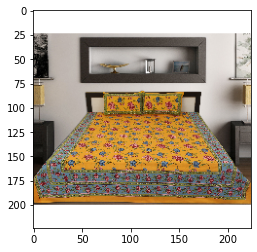

In [185]:
resized_img_exemple=resize_image(RGB_img_exemple, size=224, interpolation=cv2.INTER_AREA)
print(resized_img_exemple.shape)
plt.imshow(resized_img_exemple)

In [186]:
# Contraste et Luminosité

In [187]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

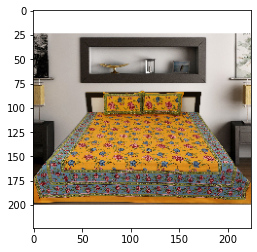

In [188]:
automatic_result, alpha, beta = automatic_brightness_and_contrast(resized_img_exemple)
plt.imshow(automatic_result)

In [189]:
# Maitenant même chose mais sur toutes les images

In [304]:
import os
import cv2 

# initialisation
dir_read = 'Flipkart/Images'
dir_write = 'preprocessed_images'

for index, row in data.iterrows():
    
    # url de l'image
    img_name = row['image']
    
    # path image
    img_path = os.path.join(dir_read, img_name)
    
    # convertir en image couleur
    img_file = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    
    # resize image (224*224 pixels)
    img_sqr = resize_image(img_rgb, size=224, interpolation=cv2.INTER_AREA)
    
    # Ajustement automatique des contrast et luminosité
    img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
    
    # enregistré image
    img_preprocessed_path = os.path.join(dir_write, img_name)
    cv2.imwrite(img_preprocessed_path, img_preprocessed)

In [310]:
from IPython.core.display import HTML

dir_name = 'preprocessed_images'
tags = []

# liste des catégories 
categories_list = list(data['category_1'].unique())

for category in categories_list:
    
    # Sampling n produits
    mask = data['category_1'] == category
    sample = data[mask].sample(n=15)
    
    # Iterating sur chaque produit
    
    tags.append('<br><b>{}</b><br>'.format(category))
    for index, row in sample.iterrows():
        # path de l'image
        img_name = row['image']
        img_path = os.path.join(dir_name, img_name)
        
        # Créate de html code pour afficher les images
        tags.append('<img src="{}" width="50" style="display:inline"/>'.format(img_path))

tags.append('<br>')
# afficher les images par catégorie
HTML(''.join(tags))

In [192]:
# 2-Bag-of-words model avec SIFT descriptors

In [193]:
import cv2
sift = cv2.SIFT_create()
def get_descriptors(image_path):
    
    # convertir image à  grayscale
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # detecter keypoints et descripteurs
    keypoints, descriptors = sift.detectAndCompute(img_gray, None)

    # return keypoints et descripteurs
    return keypoints, descriptors

(-0.5, 223.5, 223.5, -0.5)

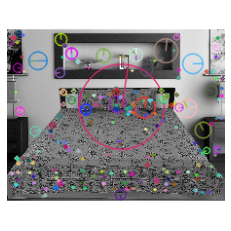

In [194]:
# exemple image path
image_name = data['image'].loc[4]
dir_name = 'preprocessed_images'
img_path1 = os.path.join(dir_name, image_name)
# descriptors de l'image
img_keypoints, img_descriptors = get_descriptors(img_path1)

# image en gray
img_gray1 = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray1)

# melter l'image avec les keypoints
img_kp1 = cv2.drawKeypoints(
    image=img_gray1,
    keypoints=img_keypoints,
    outImage=None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# afficher grey image avec les keypoints
plt.imshow(img_kp1)
plt.axis('off')

In [195]:
img_descriptors.shape

(260, 128)

In [196]:
img_descriptors[0]

array([160.,  19.,   0.,   0.,   0.,   0.,   1.,  38., 160., 117.,  13.,
        45.,  13.,   2.,   1.,   2.,  18.,  36.,  51., 112.,  33.,  20.,
        15.,   4.,  72.,  80.,  22.,   9.,   7.,   1.,   4.,   7., 133.,
        24.,   0.,   0.,   0.,   0.,   0.,  19., 160., 102.,   2.,   5.,
         6.,   6.,  14.,  44.,  51.,   9.,   3.,  16.,  50.,  96.,  93.,
        34.,  36.,  36.,  66.,  32.,  41.,  32.,  22.,  12.,  26.,   1.,
         0.,   0.,   0.,   0.,   0.,   8., 160.,   7.,   1.,   5.,   8.,
         1.,   1., 100.,  52.,   9.,   7.,  50.,  88.,  18.,   4.,  20.,
         5.,  22.,  15.,  15.,  46.,  83.,  53.,  14.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   2.,   7.,   0.,
         0.,   9.,   1.,   5.,   4.,  17.,  62.,  10.,   6.,   3.,  11.,
        36.,  15.,   2.,   5.,  10.,  25.,   9.], dtype=float32)

In [197]:
# Création des descripteurs :

In [198]:
# nous allons créer les descripteurs des points d'intérêt selon la méthode SIFT

In [199]:
from PIL import Image
import os
import cv2 

# initialisations
dir_name = 'preprocessed_images'
data.loc[:,'descriptors'] = pd.Series(index=data.index)
data['descriptors'] = data['descriptors'].astype(object)

# calculer les descriptoeurs pour chaque image 
for index, row in data.iterrows():
    
    # url de l'image
    img_name = row['image']
    
    # créer le path  de l'image 
    img_path = os.path.join(dir_name, img_name)
    
    # keypoints et descripteurs de l'image
    img_keypoints, img_descriptors = get_descriptors(img_path)
    
    # ajouter les descripteurs dans une colonne de dataframe
    data.at[index, 'descriptors'] = img_descriptors

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/2277326614.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data.loc[:,'descriptors'] = pd.Series(index=data.index)


In [200]:
data.loc[0:5,['category_1','descriptions', 'descriptions_cleaned2',
       'dominant_topic_NMF', 'dominant_topic_NMF', 'descriptors']]

category_1                                       descriptions  \
0  Home Furnishing  Elegance Polyester Multicolor Abstract Eyelet ...   
1        Baby Care  Sathiyas Cotton Bath Towel Specifications of S...   
2        Baby Care  Eurospa Cotton Terry Face Towel Set Key Featur...   
3  Home Furnishing  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Home Furnishing  Jaipur Print Cotton Floral King sized Double B...   
5          Watches  Maserati Time R8851116001 Analog Watch  - For ...   

                               descriptions_cleaned2  dominant_topic_NMF  \
0  elegance polyester multicolor abstract eyelet ...                   5   
1  sathiyas cotton bath towel sathiyas cotton bat...                   5   
2  eurospa cotton terry face towel eurospa cotton...                   5   
3  santosh royal fashion cotton double bedsheet s...                   5   
4  jaipur print cotton floral king double bedshee...                   5   
5  maserati time analog watch maserati time analo...                   0   

   dominant_topic_NMF                                        descriptors  
0                   5  [[9.0, 0.0, 1.0, 3.0, 3.0, 2.0, 13.0, 22.0, 11...  
1                   5  [[119.0, 77.0, 0.0, 0.0, 5.0, 5.0, 0.0, 2.0, 1...  
2                   5  [[5.0, 2.0, 2.0, 0.0, 0.0, 13.0, 147.0, 19.0, ...  
3                   5  [[21.0, 10.0, 24.0, 20.0, 51.0, 16.0, 1.0, 1.0...  
4                   5  [[160.0, 19.0, 0.0, 0.0, 0.0, 0.0, 1.0, 38.0, ...  
5                   0  [[8.0, 3.0, 0.0, 0.0, 8.0, 1.0, 0.0, 0.0, 110....

In [201]:
# Agrégation des descripteurs de toutes les images
for index, row in data.iterrows():
    if 'descriptors' not in globals():
        # création de l'objet d'agrégation pour les descripteurs
        descriptors = row['descriptors']
    else:
        if row['descriptors'] is not None:
            # concatenation
            descriptors = np.concatenate((descriptors, row['descriptors']), axis=0) 

print(descriptors.shape)

(208060, 128)


In [202]:
descriptors[0]

array([  9.,   0.,   1.,   3.,   3.,   2.,  13.,  22.,  11.,   5.,   3.,
        95., 114.,   2.,   2.,   6.,  83.,  37.,   8.,  53.,  63.,   8.,
         9.,  34.,  77.,   1.,   0.,   2.,  14.,   9.,  16., 116.,   0.,
         0.,   0.,   2.,  38.,  30.,  56.,  43.,  29.,   9.,   2., 119.,
       135.,  70.,  19.,  10., 135.,  35.,   3.,  38.,  40.,  10.,  26.,
       106.,  50.,   1.,   0.,   0.,   0.,   1.,  14.,  87.,   2.,   0.,
         4.,   7.,  33.,  18.,  11.,  15.,   8.,   2.,   1.,   7., 135.,
       135., 135.,  27., 109.,   7.,   1.,   3.,  13.,  37., 135., 135.,
        23.,   2.,   0.,   0.,   0.,   1.,   1.,  22.,   3.,   1.,   5.,
         7.,   9.,   2.,   2.,   6.,   5.,   3.,  11.,   6.,  20.,  20.,
        28.,   8.,   3.,   4.,   4.,  12.,  35.,  15.,  23.,   8.,   4.,
         6.,   1.,   0.,   0.,   0.,   1.,   3.], dtype=float32)

In [203]:
# Créer le "dictionnaire" de bags-of-visual-words (BoVW)

In [204]:
# Envoyez les descripteurs à l'algorithme de clustering k-means 
# et trouvez les mots visuels qui sont les points centraux.

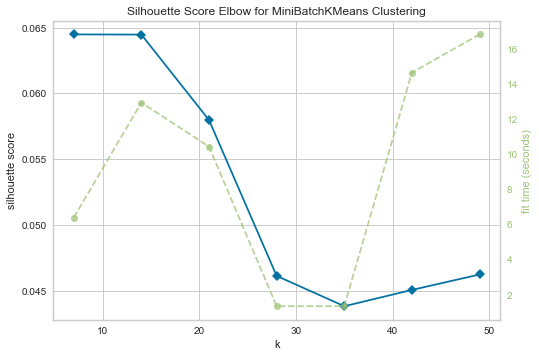

Optimal number of clusters based on silhouette score: [7]


In [131]:
# Amélioration de l'hyper-paramètre du model :
# 1-on va trouver le nombre de clusters K optimal, basé sur le coefficient de Silhouette
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn import decomposition
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
model = MiniBatchKMeans( random_state =10)
visualizer = KElbowVisualizer(model, k=range(7,50,7),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(descriptors)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

data_visualizer = pd.DataFrame(visualizer.k_values_,columns=['centers'])
data_visualizer['scores'] = visualizer.k_scores_
data_visualizer_max = data_visualizer[data_visualizer.scores == data_visualizer.scores.max()]
print('Optimal number of clusters based on silhouette score:', data_visualizer_max['centers'].tolist())

Optimal number of clusters based on DB score: [300]


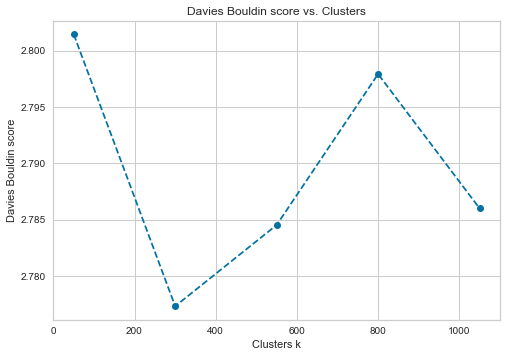

In [174]:
# 2-Davies Bouldin score pour K means

from sklearn.metrics import davies_bouldin_score 

def get_kmeans_score(data, center):

    # definir model
    kmeans = KMeans(n_clusters=center,random_state =10)

    # fit  model
    model = kmeans.fit_predict(data)
    
    # Calcule Silhoutte Score

    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(50,1300,250))

for center in centers:
    scores.append(get_kmeans_score(descriptors, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Clusters k');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. Clusters');


data_centers = pd.DataFrame(centers,columns=['centers'])
data_centers['scores'] = scores
data_centers_min = data_centers[data_centers.scores == data_centers.scores.min()]
print('Optimal number of clusters based on DB score:', data_centers_min['centers'].tolist())

In [205]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7 , init = 'k-means++', random_state =10)
y_kmeans = kmeans.fit_predict(descriptors)

In [206]:
algorithm_name = 'k-means'
standardized_features = descriptors
clusters_labels = kmeans.labels_

In [135]:
def gini(clusters_labels):
    # frequences de clusters_labels
    clusters_labels = pd.Series(clusters_labels)
    frequencies = clusters_labels.value_counts()
    mad = frequencies.mad()
    mean = frequencies.mean()

    # Gini coefficient
    gini_coeff = 0.5 * mad / mean

    return gini_coeff

In [136]:
# Créeation DataFrame des résultats
global results_df
results_df = pd.DataFrame()

def metrics_clustering(algorithm_name,
                       standardized_features,
                       clusters_labels,
                       results_df):

    from sklearn import metrics

    # Nombre de clusters
    nb_clusters = len(set(clusters_labels))
    nb_clusters = int(nb_clusters)
    results_df.loc[algorithm_name, 'Nb de clusters estimés'] = nb_clusters

    # Silhouette score
    # -------------------------------------------
    silhouette = metrics.silhouette_score(
        standardized_features,
        clusters_labels
    )
    results_df.loc[algorithm_name, 'Silhouette'] = silhouette

    # Gini coefficient
    # --------------------------------------------
    gini_coeff = gini(clusters_labels)
    results_df.loc[algorithm_name, 'Gini'] = gini_coeff

    # Sort results
    results_df = results_df.sort_values('Silhouette', ascending=False)

    print("")
    return results_df

In [490]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels,
    results_df
)

Nb de clusters estimés  Silhouette      Gini
k-means                     7.0    0.065766  0.158992
DBSCAN                      2.0    0.043870  0.496338

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_DB = KMeans(n_clusters = 300 , init = 'k-means++', random_state =10)
y_kmeans_DB = kmeans_DB.fit_predict(descriptors)

In [137]:
algorithm_name = 'k-means DB'
standardized_features = descriptors
clusters_labels_DB = kmeans_DB.labels_

In [138]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels_DB,
    results_df
)

Nb de clusters estimés  Silhouette     Gini
k-means DB                   300.0    0.029014  0.10158

In [ ]:
# Segmentation avec DBSCAN

333.51761572666595


<Figure size 360x360 with 0 Axes>

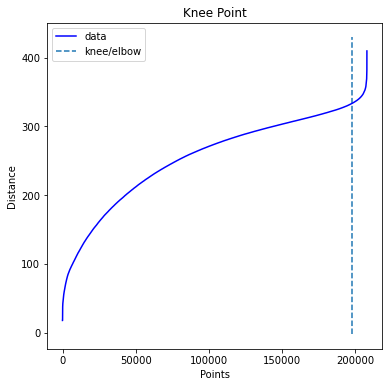

In [141]:
from sklearn.cluster import DBSCAN
# Paramètres pour eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(descriptors)
distances, indices = neighbors.kneighbors(descriptors)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
# Silhouette Score pour DBSCAN 
# pour trouver min_samples optimal


def get_dbscan_score(data, center):

    # instance
    dbscan = DBSCAN(eps= 333.51, min_samples=center)
 
    # fit model
    model = dbscan.fit(data)
    
    # Calcul Silhoutte Score

    score = silhouette_score(data, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(7,50,7))

for center in centers:
    scores.append(get_dbscan_score(descriptors, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

data_centers = pd.DataFrame(centers,columns=['min_samples'])
data_centers['scores'] = scores
data_centers_max = data_centers[data_centers.scores == data_centers.scores.max()]
print('Optimal number of min_samples based on silhouette score:', data_centers_max['min_samples'].tolist())

In [139]:
# on choisit 12 comme min_samples ln(descriptors.shape[0]) = 12
# définir le model
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps=333.51, min_samples = 12)

In [140]:
# fit model et predict clusters
clusters_labels_dbscan = model_dbscan.fit_predict(descriptors)

In [141]:
algorithm_name = 'DBSCAN'
standardized_features = descriptors
clusters_labels_dbscan = clusters_labels_dbscan

In [142]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels_dbscan,
    results_df
)

Nb de clusters estimés  Silhouette      Gini
k-means                    20.0    0.052009  0.093644
DBSCAN                      2.0    0.043870  0.496338

In [207]:
# on choisit K=7

from sklearn.cluster import MiniBatchKMeans
def visual_words_kmeans(k, descriptor_list):
    kmeans = MiniBatchKMeans(n_clusters = k, init_size=3000)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words
    
# Prendre les points centraux comme mots visuels   
visual_words = visual_words_kmeans(7, descriptors) 

In [208]:
visual_words[0]

array([ 60.58154  ,  44.763077 ,  18.138464 ,   7.566154 ,  11.701539 ,
        10.058461 ,   8.449231 ,  19.307692 ,  63.486153 ,  53.963078 ,
        19.833847 ,  12.612307 ,  26.643078 ,  14.796923 ,  10.821539 ,
        18.335384 ,  85.72923  ,  45.74461  ,  11.218462 ,   6.0215387,
        10.5138445,   8.08923  ,   7.163077 ,  21.710768 ,  25.113846 ,
        11.673845 ,   6.4707694,   5.852308 ,  15.181539 ,   9.88     ,
         7.956924 ,  11.461538 ,  83.0923   ,  42.08     ,  14.7384615,
         8.732307 ,  14.71077  ,  11.052308 ,  12.375384 ,  31.375385 ,
        82.433846 ,  48.636925 ,  24.686152 ,  29.907692 ,  48.446156 ,
        21.141539 ,  10.889232 ,  20.11077  , 125.356926 ,  56.43077  ,
        14.446154 ,   8.9169235,  11.470771 ,   6.36     ,   4.6553845,
        23.055384 ,  40.012306 ,  13.033846 ,   7.212308 ,   8.932307 ,
        19.800001 ,  11.5199995,   6.2153845,   9.972308 ,  81.283066 ,
        24.833847 ,   9.4      ,   9.892307 ,  15.473846 ,  12.2

In [209]:
# Construction des histogrammes :

In [212]:
data.loc[:,'visual_words'] = pd.Series(index=data.index)
data['visual_words'] = data['visual_words'].astype(object)
kmeans = MiniBatchKMeans(n_clusters = 7, init_size=3000)
kmeans.fit(descriptors)
# pour chaque image, convertir les descripteurs en une liste de mots visuels
for index, row in data.iterrows():
    if data.loc[index, 'descriptors'] is not None:
        visual_words_predict = list(kmeans.predict(data.loc[index, 'descriptors']))
    else:
        visual_words_predict = []
    data.at[index, 'visual_words'] = visual_words_predict

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/2885731531.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data.loc[:,'visual_words'] = pd.Series(index=data.index)


In [214]:
data.loc[:,['visual_words','image']]

visual_words  \
0     [2, 2, 1, 5, 3, 3, 3, 4, 0, 0, 2, 2, 2, 2, 1, ...   
1     [3, 5, 4, 1, 1, 1, 3, 3, 1, 3, 0, 4, 2, 0, 4, ...   
2     [4, 5, 4, 5, 3, 4, 5, 5, 2, 5, 4, 5, 4, 6, 6, ...   
3     [4, 5, 6, 5, 5, 5, 5, 2, 2, 2, 4, 2, 5, 2, 4, ...   
4     [6, 2, 2, 5, 4, 3, 6, 5, 4, 0, 6, 4, 2, 2, 5, ...   
...                                                 ...   
1045  [4, 5, 4, 5, 3, 3, 3, 3, 5, 2, 5, 2, 5, 5, 5, ...   
1046  [5, 2, 5, 5, 5, 1, 5, 0, 0, 0, 0, 3, 2, 2, 2, ...   
1047  [1, 4, 5, 2, 5, 4, 6, 1, 2, 1, 5, 2, 1, 6, 5, ...   
1048  [5, 4, 4, 1, 0, 3, 4, 4, 4, 0, 4, 4, 4, 2, 4, ...   
1049  [5, 2, 2, 2, 0, 4, 0, 6, 1, 4, 2, 5, 5, 2, 2, ...   

                                     image  
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1     7b72c92c2f6c40268628ec5f14c6d590.jpg  
2     64d5d4a258243731dc7bbb1eef49ad74.jpg  
3     d4684dcdc759dd9cdf41504698d737d8.jpg  
4     6325b6870c54cd47be6ebfbffa620ec7.jpg  
...                                    ...  
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg  
1046  fd6cbcc22efb6b761bd564c28928483c.jpg  
1047  5912e037d12774bb73a2048f35a00009.jpg  
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg  
1049  f2f027ad6a6df617c9f125173da71e44.jpg  

[1050 rows x 2 columns]

In [215]:
# Convertir la liste en un DataFrame avec des fréquences relatives
def frequency_encoding(dataframe, feature, prefix):

    def list_to_dict(my_list):
        dictionnary = {}
        for item in my_list:
            if item not in dictionnary.keys():
                dictionnary[item] = 1
            else:
                dictionnary[item] += 1
        return dictionnary

    def frequency_encoding_from_dict(dictionnary):
        frequencies = pd.Series()
        total_frequency = sum(dictionnary.values())

        for key, value in dictionnary.items():
            frequencies[prefix + str(key)] = value / total_frequency

        return frequencies

    # Convertir listes en dictionnaire
    dataframe[feature] = dataframe[feature].apply(list_to_dict)

    #  frequence
    frequency_df = dataframe[feature]\
        .apply(frequency_encoding_from_dict).fillna(0)

    # Return  frequency_encoding pd.DataFrame
    return frequency_df

In [308]:
# frequences des bags-of-visual-words
img_BOVW = frequency_encoding(data, 'visual_words', 'vw_')

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()
C:\Users\majd_\AppData\Local\Temp/ipykernel_17064/3021311355.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

In [309]:
img_BOVW.iloc[0:50]

vw_2      vw_1      vw_5      vw_3      vw_4      vw_0      vw_6
0   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
1   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
2   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
3   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
4   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
5   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
6   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
7   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
8   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
9   0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
10  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
11  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
12  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
13  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
14  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
15  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
16  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
17  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
18  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
19  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
20  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
21  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
22  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
23  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
24  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
25  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
26  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
27  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
28  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
29  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
30  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
31  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
32  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
33  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
34  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
35  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
36  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
37  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
38  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
39  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
40  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
41  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
42  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
43  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
44  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
45  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
46  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
47  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
48  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
49  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857

In [218]:
img_BOVW.shape

(1050, 7)

In [219]:
# Exportation
np.savetxt("img_BOVW.csv", img_BOVW)

In [220]:
img_BOVW

vw_2      vw_1      vw_5      vw_3      vw_4      vw_0      vw_6
0     0.129213  0.264045  0.106742  0.053371  0.140449  0.070225  0.235955
1     0.035461  0.219858  0.127660  0.049645  0.475177  0.049645  0.042553
2     0.054893  0.214797  0.162291  0.126492  0.181384  0.028640  0.231504
3     0.430868  0.099678  0.086817  0.022508  0.128617  0.096463  0.135048
4     0.196154  0.088462  0.092308  0.092308  0.092308  0.107692  0.330769
...        ...       ...       ...       ...       ...       ...       ...
1045  0.176471  0.140271  0.253394  0.144796  0.090498  0.067873  0.126697
1046  0.183333  0.041667  0.233333  0.175000  0.150000  0.150000  0.066667
1047  0.301242  0.093168  0.130435  0.096273  0.105590  0.102484  0.170807
1048  0.065217  0.086957  0.097826  0.054348  0.380435  0.163043  0.152174
1049  0.295580  0.049724  0.162983  0.171271  0.038674  0.121547  0.160221

[1050 rows x 7 columns]

In [221]:
# on va essayer de voir si les produits peuvent être visuellement séparer 
# selon les catégories sur une projection 2D basée sur le BOVW.
# et par la suite confirmer le graphique, en calculant l'ARI entre 
# les catégories et les clusters du K-Means(sur les 2 composantes du T-SNE).

In [222]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def prepare_2D_axes(df, ser_clust=None, proj=['PCA', 'UMAP', 't-SNE'],
                    model=None, centers_on=False, random_state=14):

    dict_proj = dict()

    if centers_on:  # Compute and include the centers in the points
        if model is not None:
            model = model.fit(df) if not is_fitted(model) else model
            # ### all clusterers don't have .cluster_centers method -> changed
            # centers = model.cluster_centers_ 
            # ind_centers = ["clust_" + str(i) for i in range(centers.shape[0])]
            # centers_df = pd.DataFrame(centers,
            #                           index=ind_centers,
            #                           columns=df.columns)
            #### all clusterers don't have .predict/labels_ method -> changed
            if hasattr(model, 'labels_'):
                clust = model.labels_
            else:
                clust = model.predict(df)
        else:
            clust = ser_clust
        # calculation of centers
        centers_df = df.assign(clust=clust).groupby('clust').mean()
        df = df.append(centers_df)

    ## Projection of all the points through the transformations

    # PCA
    if 'PCA' in proj:
        pca = PCA(n_components=2, random_state=random_state)
        df_proj_PCA_2D = pd.DataFrame(pca.fit_transform(df),
                                      index=df.index,
                                      columns=['PC' + str(i) for i in range(2)])
        dict_proj = dict({'PCA': df_proj_PCA_2D})

    # UMAP
    if 'UMAP' in proj:
        umap = UMAP(n_components=2, random_state=random_state)
        df_proj_UMAP_2D = pd.DataFrame(umap.fit_transform(df),
                                       index=df.index,
                                       columns=['UMAP' + str(i) for i in range(2)])
        dict_proj = dict({'UMAP': df_proj_UMAP_2D})

    # t-SNE
    if 't-SNE' in proj:
        tsne = TSNE(n_components=2, random_state=random_state)
        df_proj_tSNE_2D = pd.DataFrame(tsne.fit_transform(df),
                                       index=df.index,
                                       columns=['t-SNE' + str(i) for i in range(2)])
        dict_proj = dict({'t-SNE': df_proj_tSNE_2D})

    # Separate the clusters centers from the other points if center option in on
    if centers_on:
        dict_proj_centers = {}
        for name, df_proj in dict_proj.items():
            dict_proj_centers[name] = dict_proj[name].loc[centers_df.index]
            dict_proj[name] = dict_proj[name].drop(index=centers_df.index)
        return dict_proj, dict_proj_centers, model
    else:
        return dict_proj

In [223]:
def groups_trustworthiness(df, df_proj, ser_clust, n_neighbors=5):
    
    gb_clust = df.groupby(ser_clust)
    tw_clust, li_clust = [], []
    for n_clust, ind_sub_df in gb_clust.groups.items():
        li_clust.append(n_clust)
        tw_clust.append(trustworthiness(df.loc[ind_sub_df],
                                        df_proj.loc[ind_sub_df],
                                        n_neighbors=n_neighbors, metric='euclidean'))
    ser = pd.Series(tw_clust,
                    index=li_clust,
                    name='tw')
    return ser

In [224]:
from sklearn.manifold import trustworthiness
def plot_projection(df, model=None, ser_clust = None, proj='PCA',
                    tw_n_neigh=5, title=None, bboxtoanchor=None,
                    figsize=(5, 3), size=2, palette='tab10',
                    legend_on=False, fig=None, ax=None, random_state=14):

    fig = plt.figure(figsize=figsize) if fig is None else fig
    ax = fig.add_subplot(111) if ax is None else ax

    # a1 - if model : computes clusters, clusters centers and plot with colors
    if model is not None:

        # Computes the axes for projection with centers
        # (uses fitted model if already fitted)
        dict_proj, dict_proj_centers, model = prepare_2D_axes(df,
                                                              proj=[proj],
                                                              model=model,
                                                              centers_on=True,
                                                              random_state=random_state)

        # ...or using model already fitted in prepare_2D_axes to get it
        #### all clusterers don't have .predict/labels_ method -> changed
        if hasattr(model, 'labels_'):
            clust = model.labels_
        else:
            clust = model.predict(df)
        ser_clust = pd.Series(clust,
                                index=df.index,
                                name='Clust')
        
    # a2 - if no model but ser_clust is given, plot with colors
    elif ser_clust is not None:
        
        # Computes the axes for projection
        dict_proj, dict_proj_centers, _ = \
            prepare_2D_axes(df, ser_clust=ser_clust, proj=[proj],
                            model=None, centers_on=True,
                            random_state=random_state)

        n_clust = ser_clust.nunique()
        colors = sns.color_palette(palette, n_clust).as_hex()

    # Computing the global trustworthiness
    trustw = trustworthiness(df, dict_proj[proj],
                            n_neighbors=tw_n_neigh, metric='euclidean')
    # Computing the trustworthiness category by category
    ser_tw_clust = groups_trustworthiness(df, dict_proj[proj], ser_clust,
                                          n_neighbors=tw_n_neigh)

    # b1 - if ser_clust exists (either calculated from model or given)
    if ser_clust is not None:

        # Showing the points, cluster by cluster
        # for i in range(n_clust):
        for i, name_clust in enumerate(ser_clust.unique()):
            ind = ser_clust[ser_clust == name_clust].index
            ax.scatter(dict_proj[proj].loc[ind].iloc[:, 0],
                       dict_proj[proj].loc[ind].iloc[:, 1],
                       s=size, alpha=0.7, c=colors[i], zorder=1, cmap=plt.cm.get_cmap('RdYlGn_r'))

            # Showing the clusters centers
            ax.scatter(dict_proj_centers[proj].iloc[:, 0].loc[name_clust],
                        dict_proj_centers[proj].iloc[:, 1].loc[name_clust],
                        marker='o', c=colors[i], alpha=0.7, s=300,
                       edgecolor='k',
                       label="{}: {} | tw={:0.2f}".format(i, name_clust,
                                                          ser_tw_clust[name_clust]),
                       zorder=10) # for the labels only
            # Showing the clusters centers labels (number)
            ax.scatter(dict_proj_centers[proj].iloc[:, 0].loc[name_clust],
                        dict_proj_centers[proj].iloc[:, 1].loc[name_clust],
                        marker=r"$ {} $".format(i),#
                        c='k', alpha=1, s=70, zorder=100)
            if legend_on:
                plt.legend().get_frame().set_alpha(0.3)
            if bboxtoanchor is not None:
                plt.legend(bbox_to_anchor=bboxtoanchor)
            else: 
                plt.legend(fontsize=12)


    # b2 - if no ser_clust: only plot points in grey
    else:
        # Computes the axes for projection without centers
        dict_proj = prepare_2D_axes(df,
                                    proj=[proj],
                                    centers_on=False,
                                    random_state=random_state)
        # Plotting the point in grey
        ax.scatter(dict_proj[proj].iloc[:, 0],
                   dict_proj[proj].iloc[:, 1],
                   s=size, alpha=0.7, c='grey')

    title = "Projection: " + proj + "(trustworthiness: {:.2f})".format(trustw)\
             if title is None else title
    ax.set_title(title + "\n(trustworthiness: {:.2f})".format(trustw),
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('t-SNE feature 1'), ax.set_ylabel('t-SNE feature 2')

In [225]:
categories = pd.Series(data['category_1'].values, 
                           index=data.index,
                           name='Clust')

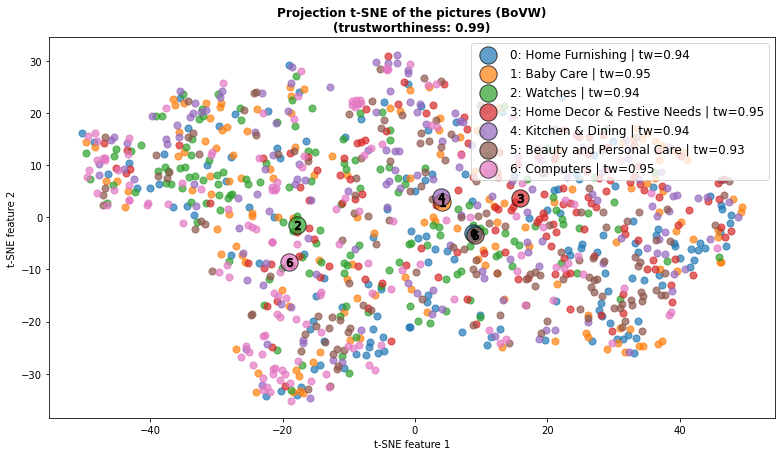

In [226]:
plot_projection(img_BOVW, model=None, ser_clust=categories,
                proj='t-SNE', size=50, legend_on=True,
                title="Projection t-SNE of the pictures (BoVW)",
                figsize=(13, 7))

In [227]:
# - On voit que les produits sont mal séparés
# - confirmons le graphique, en calculant l'ARI entre les catégories et les clusters du K-Means

In [228]:
from sklearn.cluster import KMeans
df_img_BOVW = img_BOVW.copy()

model_kmeans = KMeans(n_clusters=7) # k=7 Nb de catégories

# Fitting  le modèle Kmeans 
model_kmeans.fit(df_img_BOVW)
clusters_labels = model_kmeans.labels_

series_clusters_labels = pd.Series(clusters_labels,
                        index=data.index)

In [229]:
label_category_1 = data['category_1']
label_category_1 = LabelEncoder().fit_transform(label_category_1)

In [230]:
adjusted_rand_score(series_clusters_labels, label_category_1)

0.021232029246541866

In [231]:
adjusted_rand_score(series_clusters_labels, data['dominant_topic_NMF'])

0.004938847911641201

In [232]:
adjusted_rand_score(series_clusters_labels, y_EMB_PCA)

0.021232029246541866

In [233]:
# la valeur de l"ARI montre que les features extraites à l'aide de SIFT 
# ne sont pas très pertinentes dans notre approche non supervisée

In [234]:
# Une autre Codage :

In [235]:
k = int(round(np.sqrt(len(descriptors)),0))
print('Estimated number of clusters:', k)

Estimated number of clusters: 456


In [236]:
%%time
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=42)
kmeans.fit(descriptors)

Wall time: 44.7 s


MiniBatchKMeans(init_size=1368, n_clusters=456, random_state=42)

In [237]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("error  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

In [238]:
# Créer la matrice des histogrammes
hist_vectors=[]

for i, image_desc in enumerate(data['descriptors']) :  
    hist = build_histogram(kmeans, image_desc, i) # calcul  histogramme
    hist_vectors.append(hist) # histogramme est le vecteur feature

im_features = np.asarray(hist_vectors)

In [239]:
# Réduction de dimension avec PCA

In [240]:
from sklearn import manifold, decomposition

print("Dimensions before PCA :", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions after PCA :", feat_pca.shape)

Dimensions before PCA : (1050, 456)
Dimensions after PCA : (1050, 387)


In [241]:
columns = ['Column_' + str(i) 
          for i in range(1, len(feat_pca[0]) + 1)]
df_img_BOWV_pca = pd.DataFrame(feat_pca , 
                        columns = columns)

In [242]:
from sklearn import cluster, metrics
cls_img_BOWV_pca = cluster.KMeans(n_clusters=7, random_state=42)
cls_img_BOWV_pca.fit(feat_pca)

df_img_BOWV_pca["cluster"] = cls_img_BOWV_pca.labels_
print(df_img_BOWV_pca.shape)
score = silhouette_score(feat_pca, cls_img_BOWV_pca.labels_)  
print (" Le coefficient de Silhouette est : ", score)
labels = data["category_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls_img_BOWV_pca.labels_))

(1050, 388)
 Le coefficient de Silhouette est :  0.017966421854481933
ARI :  0.023518582201181276


In [243]:
# Réduction de dimension avec TSNE (2D)
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["category_1"]
print(df_tsne.shape)

(1050, 3)


In [244]:
df_tsne.head()

tsne1      tsne2            class
0  -2.312490  10.818355  Home Furnishing
1  18.077269  -0.834206        Baby Care
2 -13.114304   2.687088        Baby Care
3  -6.195872  -0.677126  Home Furnishing
4   2.168726  -4.178788  Home Furnishing

In [245]:
X_tsne.shape

(1050, 2)

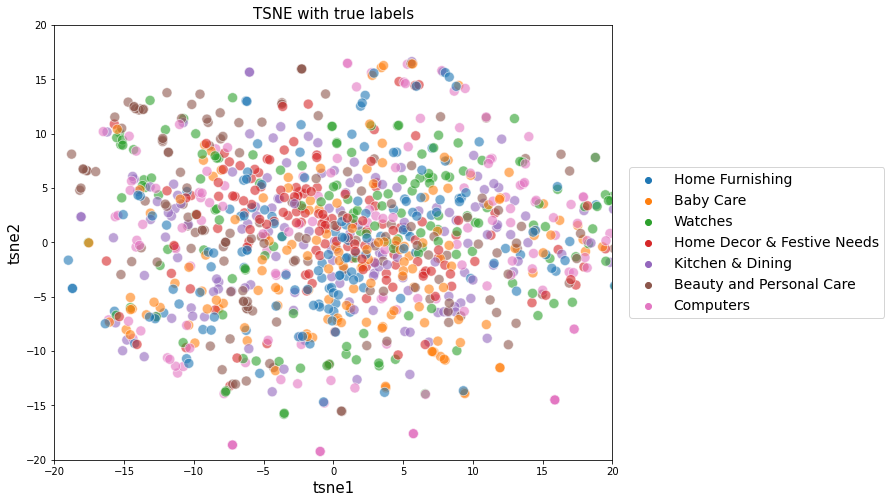

In [246]:
# Visualisation avec true labels
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_tsne, s=100, alpha=0.6)
plt.title('TSNE with true labels', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))

plt.ylim(-20, 20)
plt.xlim(-20, 20)

plt.show()

In [247]:
# Classification avec K-means
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=42)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [248]:
score = silhouette_score(X_tsne, cls.labels_)  
print (" Le coefficient de Silhouette est : ", score)

 Le coefficient de Silhouette est :  0.35501894


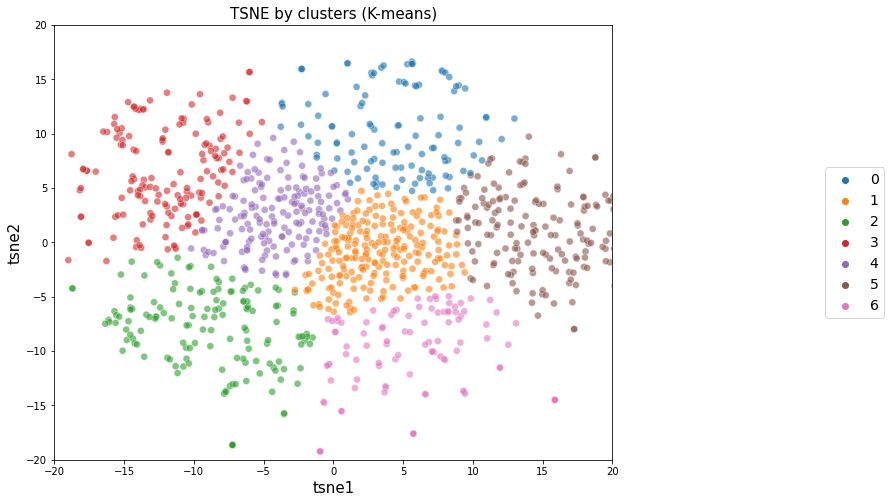

ARI :  0.028798890611778705


In [249]:
# Visualisation
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne,
                legend="brief", s=50, alpha=0.6,
                palette=sns.color_palette('tab10', n_colors=7))

plt.title('TSNE by clusters (K-means)', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))


plt.ylim(-20, 20)
plt.xlim(-20, 20)

plt.show()

labels = data["category_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [ ]:
# ARI faible donc les features extraites à l’aide de SIFT ne sont pas pertinentes 

In [250]:
############################################################################################
############################################################################################
############################################################################################

In [251]:
# 2 Extraction des features en utilisant transfer learning :

In [252]:
# Comme les features extraites à l’aide de SIFT ne sont pas pertinentes
# on va utiliser une autre méthode

In [253]:
import tensorflow.keras.applications as app
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, EfficientNetB7
from tensorflow.keras.applications import imagenet_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten

In [255]:
# la base convolutive d'un ResNet50 CNN :
convolutive_base = ResNet50(weights='imagenet',
                           include_top=False,
                           # include_top: whether to include the fully-connected layer at the top of the network
                           input_shape=(224,224,3))

In [256]:
# Extraction des features avec l'algorithme CNN Transfer

In [257]:
# Ajouter la base convolutive resnet50 à notre modèle
model_CNN = Sequential()
model_CNN.add(convolutive_base)

# Ajouter une couche pour la réduction de dimension (global max pooling)
model_CNN.add(GlobalMaxPooling2D())

In [261]:
import os
import cv2 

# initialisation
dir_read = 'Flipkart/Images'
img_features_CNN = []
for index, row in data.iterrows():
    
    # url de l'image
    img_name = row['image']
    
    # path image
    img_path = os.path.join(dir_read, img_name)
    
    # convertir en image couleur
    img_file = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
    
    # resize image (224*224 pixels)
    img_sqr = resize_image(img_rgb, size=224, interpolation=cv2.INTER_AREA)
    
    # Ajustement automatique des contrast et luminosité
    img_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_sqr)
    img = img_preprocessed
    # reshape img (np.array) to get a tensor
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    # preprocess images
    img = imagenet_utils.preprocess_input(img, data_format=None, mode='caffe')
    # get the extracted features
    img_features_CNN.append(model_CNN.predict(img).reshape(-1))   

In [262]:
series_features = pd.Series(img_features_CNN,
                     index=data.index) 

In [263]:
# dataframe avec features
img_features_CNN = pd.DataFrame.from_dict(dict(zip(series_features.index, series_features.values))).T
img_features_CNN.shape

(1050, 2048)

In [264]:
# Exportation
np.savetxt("img_features_CNN.csv", img_features_CNN)

In [265]:
# Réduction de dimenssion avec PCA
from sklearn import manifold, decomposition

print("Dimensions before PCA :", img_features_CNN.shape)
pca = decomposition.PCA(n_components=0.99)
img_features_CNN_pca= pca.fit_transform(img_features_CNN)
print("Dimensions after PCA :", img_features_CNN_pca.shape)

Dimensions before PCA : (1050, 2048)
Dimensions after PCA : (1050, 801)


In [266]:
columns = ['Column_' + str(i) 
          for i in range(1, len(img_features_CNN_pca[0]) + 1)]
df_img_features_CNN_pca = pd.DataFrame(img_features_CNN_pca , 
                        columns = columns)

In [267]:
from sklearn import cluster, metrics
cls_CNN_pca = cluster.KMeans(n_clusters=7, random_state=42)
cls_CNN_pca.fit(img_features_CNN_pca)

df_img_features_CNN_pca["cluster"] = cls_CNN_pca.labels_
print(df_img_features_CNN_pca.shape)
score = silhouette_score(img_features_CNN_pca, cls_CNN_pca.labels_)  
print (" Le coefficient de Silhouette est : ", score)
labels = data["category_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls_CNN_pca.labels_))

(1050, 802)
 Le coefficient de Silhouette est :  0.06627988
ARI :  0.4911204832667552


In [268]:
# Réduction de dimension avec TSNE (2D)
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
img_features_CNN_pca_tsne = tsne.fit_transform(img_features_CNN_pca)

df_img_features_CNN_pca_tsne = pd.DataFrame(img_features_CNN_pca_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_img_features_CNN_pca_tsne["class"] = data["category_1"]

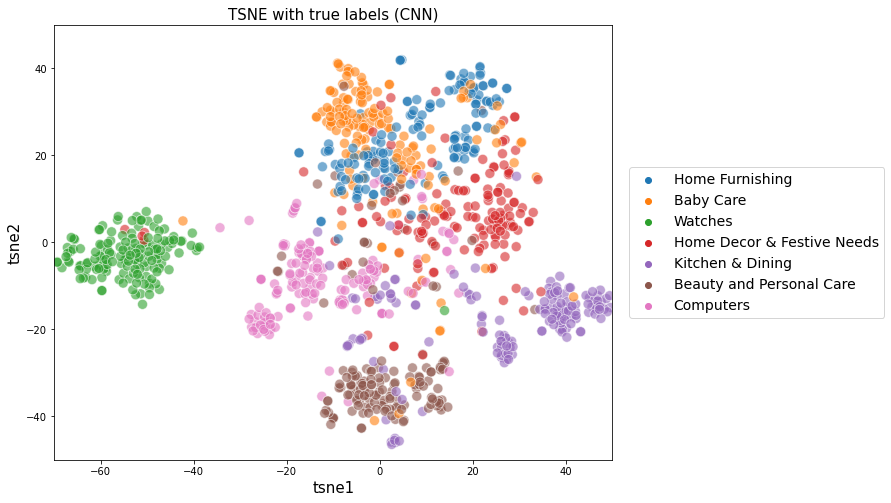

In [269]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_img_features_CNN_pca_tsne, s=100, alpha=0.6)
plt.title('TSNE with true labels (CNN)', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))

plt.ylim(-50, 50)
plt.xlim(-70, 50)

plt.show()

In [270]:
# Classification avec K-means
from sklearn import cluster, metrics

cls_CNN = cluster.KMeans(n_clusters=7, random_state=42) # k= 7 ( il y a 7 catégories)
cls_CNN.fit(img_features_CNN_pca_tsne)

df_img_features_CNN_pca_tsne["cluster"] = cls_CNN.labels_
centroids = cls_CNN.cluster_centers_
print(df_img_features_CNN_pca_tsne.shape)

(1050, 4)


In [271]:
score = silhouette_score(img_features_CNN_pca_tsne, cls_CNN.labels_)  
print (" Le coefficient de Silhouette est : ", score)

 Le coefficient de Silhouette est :  0.5231087


In [272]:
# Ajouter labels k-means à notre jeu de données
data['cluster-tsne-kmeans-CNN']=cls_CNN.labels_

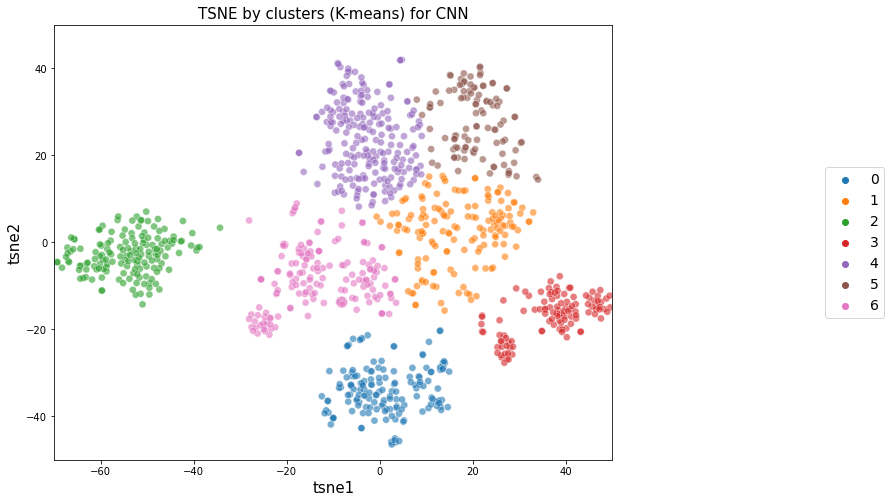

ARI with true labels:  0.5362899136439064
ARI with topic NMF:  0.3072435189316538


In [273]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_img_features_CNN_pca_tsne,
                legend="brief", s=50, alpha=0.6,
                palette=sns.color_palette('tab10', n_colors=7))

plt.title('TSNE by clusters (K-means) for CNN', fontsize = 15)
plt.xlabel('tsne1', fontsize = 15)
plt.ylabel('tsne2', fontsize = 15)
plt.legend(loc="center right", prop={'size': 14}, bbox_to_anchor=(1.5,0.5))


plt.ylim(-50, 50)
plt.xlim(-70, 50)

plt.show()

labels = data["category_1"]
print("ARI with true labels: ", metrics.adjusted_rand_score(labels, cls_CNN.labels_))
print("ARI with topic NMF: ", metrics.adjusted_rand_score(data['dominant_topic_NMF'], cls_CNN.labels_))

In [289]:
# Identification de chaque cluster :

In [283]:
from IPython.core.display import HTML

dir_name = 'preprocessed_images'
tags = []

# liste des catégories 
categories_list = list(data['cluster-tsne-kmeans-CNN'].unique())

for category in categories_list:
    
    
    # Iterating sur chaque produit
    
    tags.append('<br><b>{}</b><br>'.format(category))
    for index, row in data[data['cluster-tsne-kmeans-CNN']==category].iterrows():
        # path de l'image
        img_name = row['image']
        img_path = os.path.join(dir_name, img_name)
        
        # Créate de html code pour afficher les images
        tags.append('<img src="{}" width="50" style="display:inline"/>'.format(img_path))

tags.append('<br>')
# afficher les images par catégorie
HTML(''.join(tags))

In [340]:
# Modélisation :
# prédiction du topic NMF à partir du label kmeans
X0 = data[["cluster-tsne-kmeans-CNN"]]

y0 = data['dominant_topic_NMF']

# séparer nos données entre données d'entrainement et données de test

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [341]:
# GridSearchCV pour selectionner best model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression          
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from time import time

names = ["Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "RBF SVM",
         "Neural Net", "AdaBoost", "Naive Bayes", "LDA", "QDA", "GradientBoosting"]

N_JOBS=24
rs = np.random.RandomState(2)

classifiers = [
    GridSearchCV(KNeighborsClassifier(),
                 param_grid={'n_neighbors': [2, 4, 6, 8, 10, 15, 20, 50, 100]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(DecisionTreeClassifier(random_state=rs),
                 param_grid={'max_depth': [2, 4, 6, 8, 10]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(RandomForestClassifier(random_state=rs),
                 param_grid={'max_depth': [2, 4, 6],
                             'n_estimators': [100, 250, 300],
                             'max_features': [4, 5, 6, 'sqrt'],
                             'min_samples_leaf': [25, 30]}, 
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(LogisticRegression(max_iter=1000, random_state=rs),
                 param_grid={'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e5, 1e10],
                             'penalty': ['none', 'l2']},
                 refit=True, cv=3, n_jobs=N_JOBS),
   
    GridSearchCV(SVC(kernel='rbf', random_state=rs, 
                     class_weight='balanced'),
                 param_grid={'C': [0.1, 1, 2, 2.2, 2.5, 2.7, 3, 5, 10]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(MLPClassifier(max_iter=1000, random_state=rs),
                 param_grid={'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e3],
                             'hidden_layer_sizes': [(50,50,50), (100, 100, 100), (100,)],
                             'activation': ['tanh', 'relu'],
                             'learning_rate': ['constant','adaptive']},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                                    random_state=rs, n_estimators=200),
                 param_grid={'n_estimators': [10, 20, 50, 100],
                             'learning_rate': [0.01, 0.1, 0.5, 1, 10]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(GaussianNB(),
                 param_grid={'var_smoothing': [1e-9, 1e-8, 1e-5, 1e-1]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(LinearDiscriminantAnalysis(),
                param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                           'shrinkage': ['auto', 0, 0.5, 1],
                           'tol': [1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(QuadraticDiscriminantAnalysis(),
                param_grid={'reg_param': [0.0, 0.01, 0.05, 0.1, 0.5],
                           'tol': [1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1]},
                 refit=True, cv=3, n_jobs=N_JOBS),
    
    GridSearchCV(GradientBoostingClassifier(random_state=rs),
                param_grid={'learning_rate': [0.01, 0.1, 0.2],
                           'n_estimators': [50, 100, 200, 500],
                           'max_depth': [3, 5, 10, 20, 30]},
                 refit=True, cv=3, n_jobs=N_JOBS)
]

clf_trained_dict = {}
preds = {}

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    print(f"Evaluating classifier: {name}")

    scaler = StandardScaler()  # Scale to mean = 0 and std_dev = 1
    X0_train_scaled = scaler.fit_transform(X0_train) # Fit to training data
    
    # Fit the classifer on the tranining set
    t0 = time()
    clf.fit(X0_train_scaled, y0_train)
    print("Training time:", round(time()-t0, 4), "s")

    # Make predictions on the training set
    t1 = time()
    predictions = clf.predict(X0_train_scaled)
    print("Prediction time:", round(time()-t1, 4), "s")

    # Evaluate classifier
    print(f"The best parameters are {clf.best_params_} (score = {clf.best_score_:2f}) \n")
    print("Grid scores on training set:", "\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    # Save predictions and classifier
    preds[f'{name}'] = predictions
    clf_trained_dict[f'{name}'] = clf

Evaluating classifier: Nearest Neighbors
Training time: 0.4188 s
Prediction time: 0.0553 s
The best parameters are {'n_neighbors': 20} (score = 0.611905) 

Grid scores on training set: 

0.531 (+/-0.084) for {'n_neighbors': 2}
0.556 (+/-0.087) for {'n_neighbors': 4}
0.554 (+/-0.099) for {'n_neighbors': 6}
0.555 (+/-0.102) for {'n_neighbors': 8}
0.589 (+/-0.081) for {'n_neighbors': 10}
0.582 (+/-0.086) for {'n_neighbors': 15}
0.612 (+/-0.009) for {'n_neighbors': 20}
0.612 (+/-0.009) for {'n_neighbors': 50}
0.602 (+/-0.034) for {'n_neighbors': 100}

Evaluating classifier: Decision Tree
Training time: 0.0781 s
Prediction time: 0.0 s
The best parameters are {'max_depth': 6} (score = 0.611905) 

Grid scores on training set: 

0.417 (+/-0.017) for {'max_depth': 2}
0.595 (+/-0.029) for {'max_depth': 4}
0.612 (+/-0.009) for {'max_depth': 6}
0.612 (+/-0.009) for {'max_depth': 8}
0.612 (+/-0.009) for {'max_depth': 10}

Evaluating classifier: Random Forest
Training time: 25.7461 s
Prediction time

Training time: 0.7377 s
Prediction time: 0.0 s
The best parameters are {'C': 0.001, 'penalty': 'l2'} (score = 0.338095) 

Grid scores on training set: 

0.298 (+/-0.020) for {'C': 1e-05, 'penalty': 'none'}
0.273 (+/-0.003) for {'C': 1e-05, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 0.0001, 'penalty': 'none'}
0.273 (+/-0.003) for {'C': 0.0001, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 0.001, 'penalty': 'none'}
0.338 (+/-0.054) for {'C': 0.001, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 0.01, 'penalty': 'none'}
0.298 (+/-0.020) for {'C': 0.01, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 0.1, 'penalty': 'none'}
0.298 (+/-0.020) for {'C': 0.1, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 1, 'penalty': 'none'}
0.298 (+/-0.020) for {'C': 1, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 10.0, 'penalty': 'none'}
0.298 (+/-0.020) for {'C': 10.0, 'penalty': 'l2'}
0.298 (+/-0.020) for {'C': 100000.0, 'penalty': 'none'}
0.298 (+/-0.020) for {'C': 100000.0, 'penalty': 'l2'}
0.298 (+/-0.020) for {'

Training time: 4.1531 s
Prediction time: 0.0 s
The best parameters are {'learning_rate': 0.01, 'n_estimators': 10} (score = 0.611905) 

Grid scores on training set: 

0.612 (+/-0.009) for {'learning_rate': 0.01, 'n_estimators': 10}
0.612 (+/-0.009) for {'learning_rate': 0.01, 'n_estimators': 20}
0.612 (+/-0.009) for {'learning_rate': 0.01, 'n_estimators': 50}
0.612 (+/-0.009) for {'learning_rate': 0.01, 'n_estimators': 100}
0.612 (+/-0.009) for {'learning_rate': 0.1, 'n_estimators': 10}
0.570 (+/-0.109) for {'learning_rate': 0.1, 'n_estimators': 20}
0.536 (+/-0.061) for {'learning_rate': 0.1, 'n_estimators': 50}
0.515 (+/-0.118) for {'learning_rate': 0.1, 'n_estimators': 100}
0.552 (+/-0.094) for {'learning_rate': 0.5, 'n_estimators': 10}
0.577 (+/-0.057) for {'learning_rate': 0.5, 'n_estimators': 20}
0.426 (+/-0.009) for {'learning_rate': 0.5, 'n_estimators': 50}
0.505 (+/-0.164) for {'learning_rate': 0.5, 'n_estimators': 100}
0.552 (+/-0.094) for {'learning_rate': 1, 'n_estimators': 

In [342]:
# le meilleur modèle selectionné est KNeighborsClassifier avec n_neighbors=20 (score = 0.611905)
best_model_knn_cluster_to_topic_NMF = KNeighborsClassifier(n_neighbors=20, weights='uniform')
best_model_knn_cluster_to_topic_NMF.fit(X0_train, y0_train)
y_topic_NMF_pred = best_model_knn_cluster_to_topic_NMF.predict(X0_test)
print("Accuracy for KNN  on CV data: ", accuracy_score(y0_test, y_topic_NMF_pred))
print("Precision for KNN on CV data: ", precision_score(y0_test, y_topic_NMF_pred, average='macro'))
print("ARI for KNN on CV data: ", metrics.adjusted_rand_score(y0_test, y_topic_NMF_pred))

Accuracy for KNN  on CV data:  0.5476190476190477
Precision for KNN on CV data:  0.4463367474164816
ARI for KNN on CV data:  0.34297189897132013


Rappel: 0.6075829181514756
Accuracy: 0.5476190476190477
Precision: 0.4463367474164816
F-mesure: 0.4954221575165417
adjusted_rand_score: 0.34297189897132013


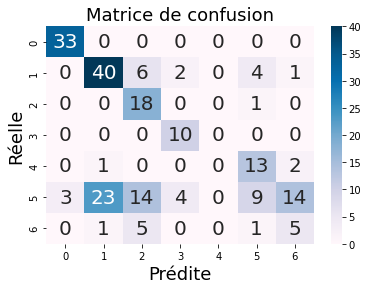

None


In [349]:
print(evaluation(y0_test, y_topic_NMF_pred))

In [281]:
# Un moteur de classification (input = image produit et output la gatégorie)
# est réalisable avec pécision 0.44*0.76 = 0.33: 
#
#   1- Extraction des features avec l'algorithme CNN Transfer
#   2- Réduction de dimenssion avec PCA
#   3- Réduction de dimension avec TSNE (2D)
#   4- Classification avec K-means des features (ARI =0.53 entre labels et catégories)
#   5- Prédiction du topic NMF correspondant à chaque label (précision =  0.44 et ARI = 0.34)
#   6- Prédiction de la catégorie du produit à partir du topic NMF pédite (pécision = 0.76 et ARI = 0.32)

In [355]:
# Complement :
# Un exemple sur un nouveau ensemble d'images 

In [412]:
#import the library opencv
import cv2
#globbing utility.
import glob
#select the path
image_test_name = []
img_test_features_CNN = []
path = "Images_test/*.*"
for file in glob.glob(path):
    base=os.path.basename(file)
    os.path.splitext(base)
    image_test_name.append(os.path.splitext(base)[0])

     # convertir en image couleur
    img_test_file = cv2.imread(file)
    img_test_rgb = cv2.cvtColor(img_test_file, cv2.COLOR_BGR2RGB)
    
    # resize image (224*224 pixels)
    img_test_sqr = resize_image(img_test_rgb, size=224, interpolation=cv2.INTER_AREA)
    
    # Ajustement automatique des contrast et luminosité
    img_test_preprocessed, alpha, beta = automatic_brightness_and_contrast(img_test_sqr)
    img_test = img_test_preprocessed
    # reshape img (np.array) to get a tensor
    img_test = img_test.reshape(1, img_test.shape[0], img_test.shape[1], img_test.shape[2])
    # preprocess images
    img_test = imagenet_utils.preprocess_input(img_test, data_format=None, mode='caffe')
    # get the extracted features
    img_test_features_CNN.append(model_CNN.predict(img_test).reshape(-1))

In [413]:
series_test_features = pd.Series(img_test_features_CNN) 

In [418]:
# dataframe avec features
img_test_features_CNN = pd.DataFrame.from_dict(dict(zip(series_test_features.index, series_test_features.values))).T
img_test_features_CNN.shape

(122, 2048)

In [419]:
# Réduction de dimenssion avec PCA
from sklearn import manifold, decomposition

print("Dimensions before PCA :", img_test_features_CNN.shape)
pca = decomposition.PCA(n_components=0.99)
img_test_features_CNN_pca= pca.fit_transform(img_test_features_CNN)
print("Dimensions after PCA :", img_test_features_CNN_pca.shape)

Dimensions before PCA : (122, 2048)
Dimensions after PCA : (122, 114)


In [420]:
columns_test = ['Column_' + str(i) 
          for i in range(1, len(img_test_features_CNN_pca[0]) + 1)]
df_img_test_features_CNN_pca = pd.DataFrame(img_test_features_CNN_pca , 
                        columns = columns_test)

In [421]:
# Réduction de dimension avec TSNE (2D)
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
img_test_features_CNN_pca_tsne = tsne.fit_transform(img_test_features_CNN_pca)

df_img_test_features_CNN_pca_tsne = pd.DataFrame(img_test_features_CNN_pca_tsne[:,0:2], columns=['tsne1', 'tsne2'])

In [422]:
data_img_test_features_CNN_pca_tsne=df_img_test_features_CNN_pca_tsne[['tsne1', 'tsne1']]

In [423]:
# predict using the loaded model K-means
pred_labels = cls_CNN.predict(data_img_test_features_CNN_pca_tsne)
                              
df_img_test_features_CNN_pca_tsne["cluster"] = pred_labels
print(df_img_test_features_CNN_pca_tsne.shape)

(122, 3)


In [424]:
# predict topic using the loaded model KNN
topic_NMF_pred_test = best_model_knn_cluster_to_topic_NMF.predict(df_img_test_features_CNN_pca_tsne[["cluster"]])
                              
data_img_test_features_CNN_pca_tsne["topic_NMF_pred"] = topic_NMF_pred_test

In [426]:
# Prédir de la catégorie avec le meilleur modèle
best_model_knn_topic_to_category.fit(X, y)

# predict Category using the loaded model KNN
category_pred_test = best_model_knn_topic_to_category.predict(data_img_test_features_CNN_pca_tsne[["topic_NMF_pred"]])
                              
data_img_test_features_CNN_pca_tsne["category_pred_test"] = category_pred_test

In [427]:
# Determination de la catégorie à partir du topic NMF

def class_category_pred(row):
    if row["topic_NMF_pred"] == 0:
        category_pred = 'Watches'
    elif row["topic_NMF_pred"] == 1:
        category_pred = 'Beauty and Personal Care'
    elif row["topic_NMF_pred"] == 2:
        category_pred = 'Baby Care'
    elif row["topic_NMF_pred"] == 3:
        category_pred = 'Kitchen & Dining'
    elif row["topic_NMF_pred"] == 4:
        category_pred = 'Home Decor & Festive Needs'
    elif row["topic_NMF_pred"] == 5: 
        category_pred = 'Computers'   
    else:
        category_pred = 'Home Furnishing'
        
    return category_pred

data_img_test_features_CNN_pca_tsne['category_pred_test'] = data_img_test_features_CNN_pca_tsne.apply(lambda row: class_category_pred(row),axis=1)

In [428]:
df_img_test_features_CNN_pca_tsne['image_test_name'] = image_test_name
from IPython.core.display import HTML

dir_name = 'Images_test'
tags_test = []

# liste des catégories 
categories_list_test = list(data_img_test_features_CNN_pca_tsne['category_pred_test'].unique())

for category in categories_list_test:
    
    # Iterating sur chaque produit
    
    tags_test.append('<br><b>{}</b><br>'.format(category))
    for index, row in df_img_test_features_CNN_pca_tsne[
        data_img_test_features_CNN_pca_tsne['category_pred_test']==category].iterrows():
        # path de l'image
        img_name = row['image_test_name']+'.jpg'
        img_path = os.path.join(dir_name, img_name)
        
        # Créate de html code pour afficher les images
        tags_test.append('<img src="{}" width="50" style="display:inline"/>'.format(img_path))

tags_test.append('<br>')
# afficher les images par catégorie
HTML(''.join(tags_test))